# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `9` | `Questions`
#### YU Lingfeng Draft 1

> Hi Team, 👋

> The initial problem sets were designed for practicing supervised learning in classification problems and hierarchical risk parity algorithms, as well as applying unsupervised learning to portfolio management.

> Given that we haven't covered some these topics in depth yet and will be discussing them further in Lessons 9 and 10, the problem sets have been revised.

> Having reviewed your submissions so far, some of the questions have been crafted specifically to enhance your grasp of the course material.

> I trust that the exercises below will support your review and understanding of the course content. 🤞

#### <font color = "green"> Please submit your answers via the eLearn submission folder. Again, you may submit incomplete answers. (Answer as fully as you can. This will help me to see where you stand.)

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
from matplotlib.ticker import PercentFormatter
import datetime 
import yfinance as yf
yf.pdr_override()

In [4]:
# For HRP

from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.cluster.hierarchy import fcluster

from sklearn.preprocessing import StandardScaler

from sklearn import cluster, covariance, manifold
from sklearn.metrics import adjusted_mutual_info_score
# AGglomerative NESting
from sklearn.cluster import AgglomerativeClustering 

import scipy.cluster.hierarchy as sch

In [5]:
# For PCA

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

In [6]:
# For Q8

from sklearn.linear_model import LinearRegression

# Regularization
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# ENSEMBLE

## Bagging (Bootstrapped Aggregation)
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

## Boosting
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Support Vector Machine
from sklearn.svm import SVR

# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor

# Multi-layer Perceptron (Neural Networks)
from sklearn.neural_network import MLPRegressor

# for data split
from sklearn.model_selection import train_test_split

# for cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# for assessment
from sklearn.metrics import mean_squared_error

# for Feature Selection
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import SelectKBest
import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm

from pandas.plotting import scatter_matrix

# for Pre-processing (Feature Engineering)
from sklearn.preprocessing import StandardScaler

# assumption checks for Time-Series
from statsmodels.graphics.tsaplots import plot_acf


## 👇 <font color = "purple"> Bigger Question 1. 
    
### The first question is to look for clusters of correlations using the agglomerate hierarchical clustering technique (AGNES).
    
### <font color = green> Using the 102 tickers below, and what you have learned in class, run the analysis and develop a dendrogram. Make sure to employ the inclusion criterion of less than 30% of missing values.
    
    According to the dendrogram, which of the stocks are most correlated? 
    
    Also based on the dendrogram, please identify two stocks that are not well correlated.

In [7]:
nasdaq100_components = pd.read_html("https://en.wikipedia.org/wiki/Nasdaq-100")[4]

nasdaq100_components

Company Ticker             GICS Sector  \
0                   Adobe Inc.   ADBE  Information Technology   
1                          ADP    ADP             Industrials   
2                       Airbnb   ABNB  Consumer Discretionary   
3             Align Technology   ALGN             Health Care   
4      Alphabet Inc. (Class A)  GOOGL  Communication Services   
..                         ...    ...                     ...   
96      Warner Bros. Discovery    WBD  Communication Services   
97               Workday, Inc.   WDAY  Information Technology   
98                 Xcel Energy    XEL               Utilities   
99   Zoom Video Communications     ZM  Information Technology   
100                    Zscaler     ZS  Information Technology   

                        GICS Sub-Industry  
0                    Application Software  
1    Human Resource & Employment Services  
2          Hotels, Resorts & Cruise Lines  
3                    Health Care Supplies  
4            Interactive Media & Services  
..                                    ...  
96                           Broadcasting  
97                   Application Software  
98                        Multi-Utilities  
99                   Application Software  
100                  Application Software  

[101 rows x 4 columns]

### Below are the lines of code that lead to an answer:

In [8]:
def clean_dataset(dataset, threshold):
    Missing_Values =\
    (
          dataset
          .isnull()
          .values
          .any()
     )
    print(f"Missing Values? = {Missing_Values}")
    if Missing_Values:
        missing_fractions = \
            dataset \
            .isnull() \
            .mean() \
            .sort_values(ascending = False)
        drop_list =\
            sorted(list(missing_fractions
                        [missing_fractions > 0.3]
                        .index)
                   )
        dataset =\
            dataset \
            .drop(labels= drop_list, 
                  axis=1)
    # Fill the missing values with the last value available in the dataset. 
    dataset = dataset.fillna(method = "ffill")
    return dataset

### <font color = red> Answer 1 is presented in the cell below: </font>

In [9]:
tickers = list(nasdaq100_components.loc[:, 'Ticker'].values)
raw = yf.download(tickers, start="2019-10-24", end="2023-10-25")

[*********************100%%**********************]  101 of 101 completed


In [10]:
data = clean_dataset(raw[[('Adj Close')]].droplevel(0, axis = 1), 0.3)
data.to_csv("PS9_Q1_data_clean.csv")

Missing Values? = True


In [11]:
data

AAPL        ABNB        ADBE         ADI         ADP  \
Date                                                                     
2019-10-24   59.226208         NaN  269.700012   97.749535  149.505402   
2019-10-25   59.955654         NaN  270.980011   99.150978  148.971909   
2019-10-28   60.556225         NaN  271.350006  101.007217  149.450211   
2019-10-29   59.155689         NaN  271.450012  100.283287  149.772156   
2019-10-30   59.148399         NaN  278.410004  100.468895  150.986313   
...                ...         ...         ...         ...         ...   
2023-10-18  175.839996  122.169998  557.869995  171.270004  248.259995   
2023-10-19  175.460007  119.970001  555.739990  168.720001  246.080002   
2023-10-20  172.880005  116.489998  540.960022  166.520004  241.679993   
2023-10-23  173.000000  120.389999  540.409973  163.869995  241.160004   
2023-10-24  173.440002  122.010002  539.559998  164.929993  240.449997   

                  ADSK        AEP        ALGN        AMAT         AMD  ...  \
Date                                                                   ...   
2019-10-24  145.369995  83.430397  249.470001   52.897724   31.719999  ...   
2019-10-25  145.539993  82.236290  243.380005   53.522087   32.709999  ...   
2019-10-28  146.990005  81.382133  250.419998   54.703552   33.689999  ...   
2019-10-29  145.589996  81.207809  256.119995   53.329967   33.029999  ...   
2019-10-30  148.779999  82.018379  252.710007   53.032188   33.130001  ...   
...                ...        ...         ...         ...         ...  ...   
2023-10-18  209.639999  75.169998  272.399994  141.449997  102.169998  ...   
2023-10-19  206.070007  74.419998  270.290009  134.429993  102.400002  ...   
2023-10-20  202.690002  73.349998  269.880005  134.119995  101.809998  ...   
2023-10-23  199.720001  73.349998  265.720001  134.229996  100.010002  ...   
2023-10-24  205.039993  74.739998  265.459991  134.899994  101.669998  ...   

                  TTD         TXN        VRSK        VRTX        WBA  \
Date                                                                   
2019-10-24  19.697001  105.173393  145.925064  194.470001  45.506775   
2019-10-25  20.261999  107.038651  145.116272  194.490005  46.317455   
2019-10-28  20.997000  106.585663  144.755707  194.020004  46.635036   
2019-10-29  20.731001  106.843239  146.285599  197.889999  47.027847   
2019-10-30  20.966000  105.411392  144.141815  199.279999  46.685188   
...               ...         ...         ...         ...        ...   
2023-10-18  76.769997  150.440979  238.130005  367.549988  21.250000   
2023-10-19  75.870003  149.568970  234.449997  364.799988  20.959999   
2023-10-20  74.059998  146.467392  234.449997  361.859985  21.260000   
2023-10-23  73.639999  144.990936  230.869995  367.660004  21.959999   
2023-10-24  76.519997  145.585480  230.139999  369.380005  21.370001   

                  WBD        WDAY        XEL         ZM          ZS  
Date                                                                 
2019-10-24  27.540001  158.589996  57.651665  64.519997   43.330002  
2019-10-25  27.570000  160.750000  56.847713  63.450001   42.860001  
2019-10-28  27.790001  159.399994  55.775784  66.559998   42.410000  
2019-10-29  27.420000  158.110001  55.900848  65.489998   43.119999  
2019-10-30  26.910000  164.100006  56.561863  70.000000   45.160000  
...               ...         ...        ...        ...         ...  
2023-10-18  10.580000  214.610001  59.330002  62.970001  170.399994  
2023-10-19  10.390000  213.259995  59.049999  62.360001  169.070007  
2023-10-20  10.330000  211.160004  58.099998  61.709999  162.190002  
2023-10-23  10.140000  209.580002  58.049999  61.130001  162.479996  
2023-10-24  10.080000  212.369995  59.080002  62.139999  164.789993  

[1007 rows x 98 columns]

In [12]:
missing_values =\
(
    data
    .isnull() # True (1) vs. False (0)
    .mean()
    .sort_values(ascending = False)
)
missing_values.head(10)

ABNB    0.283019
LCID    0.225422
MRNA    0.000000
PANW    0.000000
ORLY    0.000000
ON      0.000000
ODFL    0.000000
NXPI    0.000000
NVDA    0.000000
NFLX    0.000000
dtype: float64

In [13]:
data.shape[1]

98

In [14]:
def data_divide(dataset, train_rate):
    x = dataset.copy("deep")
    row = len(x)
    train_len = int(row * train_rate)
    x_train = x.head(train_len)
    x_test = x.tail(row - train_len)
    returns_train = x_train.pct_change().dropna()
    returns_test = x_test.pct_change().dropna()
    
    return x_train, x_test, returns_train, returns_test

In [15]:
X_train, X_test, returns, returns_test = data_divide(data, 0.75)

In [16]:
def correlation_distance(corr):
   # Compute the distance matrix from the correlation matrix
   # The values in the distance matrix range between 0 and 1. 
    dist = ((1 - corr) / 2.0) ** 0.5
    
    return dist
    
def plot_Dendrogram(df, method_str):
    # Compute the correlation matrix for 'returns'
    # and then convert that into a distance matrix using 'correlation_distance' function
    dist =\
        correlation_distance(returns
                             .corr()
                             )
    
    # Perform hierarchical clustering on the distance matrix using Ward's method
    link =\
        linkage(dist,
                method_str)

#     # Retrieve the first linkage from the resulting hierarchical clustering
#     link[0]    
    # Visualize HC
    plt.figure(figsize = [20, 8]
              )

    plt.title(f"Dendrogram for HC on {df.shape[1]} assets")

    dendrogram(link,
               labels = df.columns)
    plt.savefig(f'Dendrogram for HC on {df.shape[1]} assets.png')
    plt.show()
    return link

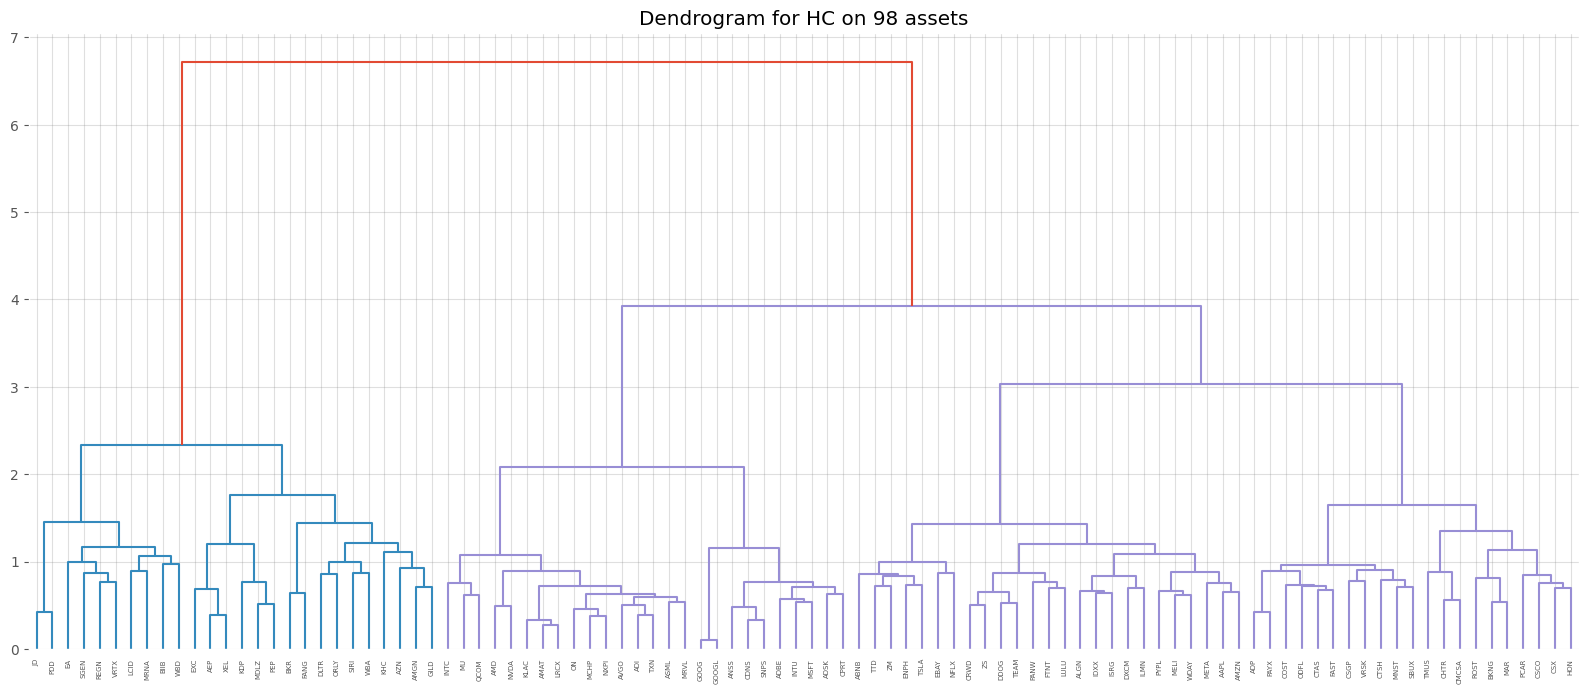

In [17]:
# "single"， "complete"， "average"， "centroid"， "ward"
linkage_matrix = plot_Dendrogram(data, 'ward')

In [18]:
# only read the dendrogram?
most_pair = ['GOOG', 'GOOGL'] # find shortest hight
least_pair = ['GLD', 'CSX'] # find most branch paths

## 👇 <font color = "purple"> Bigger Question 2. ### 

### The second question asks you to run a principal components analysis (PCA) for portfolio management. Begin your analysis with all the above stocks. Make sure to employ the inclusion criterion of less than 30% of missing values.
    
    Your objective is to find the portfolio using PCA.
    
    Select and normalize the four largest components and use them as weights for 
    portfolios that you can compare to an equal-weighted portfolio comprising all stocks.
    
    Identify the profile of the portfolio based on the portfolio weights.
    
    When comparing the performance of each portfolio over the sample period 
    to "the market", assess the performance of other portfolios that capture different 
    return patterns.
    
> Please use 75% of your data for PCA and 25% for backtesting.    
    
### <font color = "green"> NOTE: The investment horizon will be 10 years between 2010 and 2019.

### Below are the lines of code that lead to an answer:

In [19]:
raw2 = yf.download(tickers, start="2010-01-01", end="2020-01-01")

[*********************100%%**********************]  101 of 101 completed


5 Failed downloads:
['GFS', 'CEG', 'GEHC', 'ABNB', 'LCID']: Exception("%ticker%: Data doesn't exist for startDate = 1262322000, endDate = 1577854800")


In [20]:
data2 = clean_dataset(raw2[[('Adj Close')]].droplevel(0, axis = 1), 0.3)
data2.to_csv("PS9_Q2_data_clean.csv")

Missing Values? = True


### <font color = red> Answer 2 is presented in the cell below: </font>

In [21]:
X2_train, X2_test, returns2, returns2_test = data_divide(data2, 0.75)

In [22]:
def calculate_sharpe_ratio(ts_returns, periods_per_year = 252):

    n_years = ts_returns.shape[0] / periods_per_year

    annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
                                ) - 1

    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)

    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

def PCA_portfolios(data_df, missing_rate, train_rate, NumEigenValues, NumComponents):
    data = data_df.copy()
    missing_values =\
    (
        data
        .isnull() # True (1) vs. False (0)
        .mean()
        .sort_values(ascending = False)
    )
    drop_list =\
    (
        sorted(list(missing_values[missing_values > missing_rate]
                    .index)
              )
    )
    data =\
    (
        data
        .drop(labels = drop_list,
              axis = 1)
    )    

    # Fill the missing values with the last value available in the dataset. 
    data.fillna(method = "ffill", inplace = True)

    Daily_Linear_Return =\
    (
        data
        .pct_change(1)
    )
    
    # Operational defition of outliers = data points beyond 3 SD
    Daily_Linear_Return =\
    (
        Daily_Linear_Return[Daily_Linear_Return 
                            .apply(lambda x:(x - x.mean()
                                            ).abs() < (3 * x.std()
                                                      )
                                  )
                            .all(1)
        ]
    )
    scaler =\
    (
        StandardScaler()
        .fit(Daily_Linear_Return)
    )
    scaled_data =\
    (
        pd
        .DataFrame(scaler.fit_transform(Daily_Linear_Return),
                   columns = Daily_Linear_Return.columns,
                   index = Daily_Linear_Return.index)
    )

    prop =\
        int(len(scaled_data) * train_rate)

    X_Train = scaled_data[    : prop] # First 80% of the data
    X_Test  = scaled_data[prop:     ] # Remaining 20% of the data

    X_Train_Raw = Daily_Linear_Return[    :prop]
    X_Test_Raw  = Daily_Linear_Return[prop:    ]    

    stock_tickers =\
    (
     scaled_data
     .columns
     .values
    )    
    
    pca = PCA()
    PrincipalComponent = pca.fit(X_Train)
    
    weights = pd.DataFrame()

    for i in range(len(pca.components_)
                  ):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i]
                                                                  )

    weights = weights.values.T


    # Extract the top principal components from the PCA object
    # and create a DataFrame with columns named after the original features

    topPortfolios =\
    (
        pd
        .DataFrame(pca.components_[ : NumComponents],
                   columns = data.columns)
    )

    # Normalize the weights of the top portfolios such that the weights sum up to 1 for each portfolio
    # This is done by dividing each weight by the sum of weights for the respective portfolio

    eigen_portfolios =\
    (
        topPortfolios
        .div(topPortfolios.sum(1),
             axis = 0)
    )

    # Rename the index of the eigen_portfolios DataFrame for better readability

    eigen_portfolios.index = [f"Portfolio {i}" for i in range(NumComponents)
                             ]

    # Calculate the square root of the explained variance for each component
    # This provides the standard deviation of returns for each eigenportfolio
    np.sqrt(pca.explained_variance_)    
    
        
    # to find on eigen portfolios            
    n_portfolios = len(pca.components_)
    
    annualized_ret = np.array([0.] * n_portfolios)
    
    sharpe_metric = np.array([0.] * n_portfolios)
    
    annualized_vol = np.array([0.] * n_portfolios)
    
    highest_sharpe = 0
    
    stock_tickers = scaled_data.columns.values
    
    n_tickers = len(stock_tickers)
    
    PCs = pca.components_
    
    for i in range(n_portfolios):
        
        pc_w = PCs[i] / sum(PCs[i]
                           )
        
        eigen_prtfi = pd.DataFrame(data = {"weights": pc_w.squeeze()*100}, 
                                   index = stock_tickers)
        
        eigen_prtfi.sort_values(by = ["weights"],
                                ascending = False,
                                inplace = True)
        
        eigen_prti_returns = np.dot(X_Train_Raw.loc[:, eigen_prtfi.index], 
                                    pc_w)
        
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(),
                                       index = X_Train_Raw.index)
        
        er, vol, sharpe = calculate_sharpe_ratio(eigen_prti_returns)
        
        annualized_ret[i] = er
        
        annualized_vol[i] = vol
        
        sharpe_metric[i] = sharpe
        
        sharpe_metric = np.nan_to_num(sharpe_metric)
        
    # HOW TO FIND A PORTFOLIO with the HIGHEST Sharpe Ratio
    
    highest_sharpe = np.argmax(sharpe_metric)
    
    print("Our Eigen Portfolio #%d with the highest Sharpe.\
    Return %.2f%%, vol = %.2f%%, Sharpe = %.2f" %
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100,
           annualized_vol[highest_sharpe]*100,
           sharpe_metric[highest_sharpe]
          )
         )
        
    #####
    
    fig, ax = plt.subplots()
    
    fig.set_size_inches(16, 6)
    
    ax.plot(sharpe_metric, 
            linewidth = 2)
    
    ax.set_title("Sharpe Ratio of Eigen-Portfolios")
    
    ax.set_ylabel("Sharpe Ratio")
    
    ax.set_xlabel("Portfolios")
    
    #####
        
    results = pd.DataFrame(data = {"Return": annualized_ret,
                                   "Vol": annualized_vol,
                                   "Sharpe": sharpe_metric}
                           )
    
    results.dropna(inplace = True)
    
    results.sort_values(by = ["Sharpe"],
                        ascending = False,
                        inplace = True)
#     results = results.loc[results["Sharpe"]<20]
    results = results.iloc[:NumEigenValues]
    
    #####
    fig, axes =\
    (
        plt
        .subplots(ncols = 2,
                  figsize = [16, 6]
                 )
    )

    # Plot on the left panel

    Series1 =\
    (
        pd
        .Series(pca
                .explained_variance_ratio_[ :NumEigenValues]
               )
        .sort_values()
        * 100
    )

    # Plot on the right panel

    Series2 =\
    (
        pd
        .Series(pca
                .explained_variance_ratio_[ :NumEigenValues]
               )
        .cumsum()
        * 100
    )

    (
        Series1
        .plot
        .barh(ylim = (0, 9),
              title = "Explained Variance Ratio by Top 10 PCs",
              ax = axes[0]
             )
    )

    (
        Series2
        .plot(ylim = (0, 100),
              xlim = (0, 9),
              title = "Cumulative Explained Variance by Each PC",
              ax = axes[1]
             )
    )
    
    return [weights, eigen_portfolios, results, X_Test_Raw, X_Test]

def view_eigen_portfolios(eigen_portfolios, NumComponents):
    (
    eigen_portfolios
    .T  # Transpose the DataFrame to have portfolios as columns and assets as rows
    .plot
    .bar(subplots = True,
         layout = (int(NumComponents), 1),
         legend = False,
         sharey = True,
         figsize = [16, 20],
         ylim = [-1, 1]
        )  
    )
    return


Our Eigen Portfolio #80 with the highest Sharpe.    Return inf%, vol = 12660.58%, Sharpe = 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.00


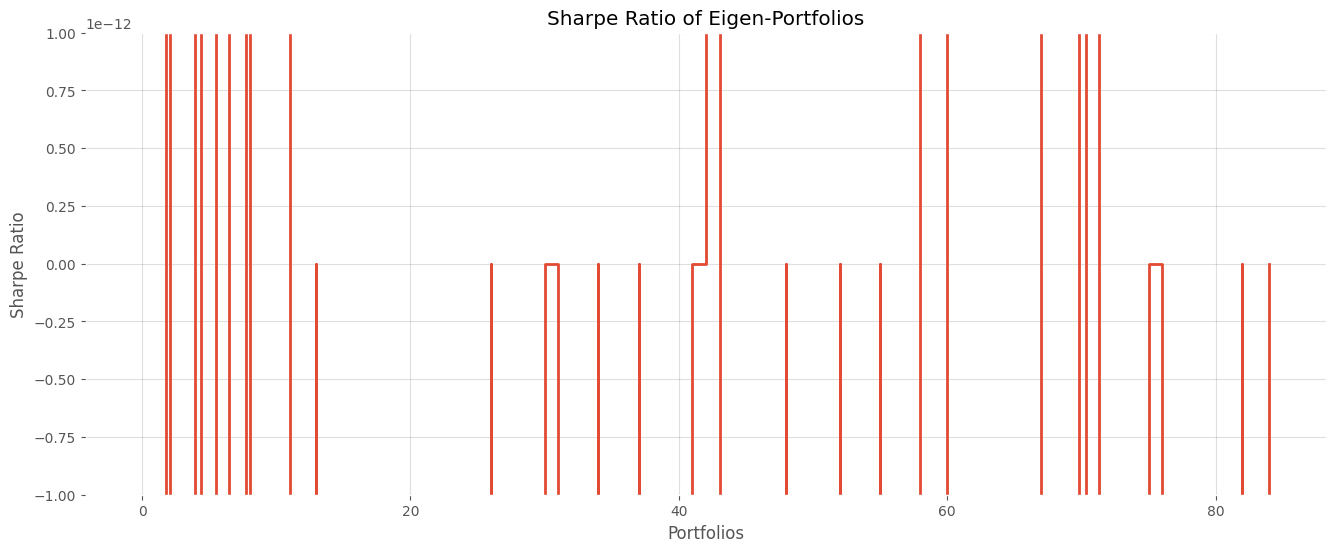

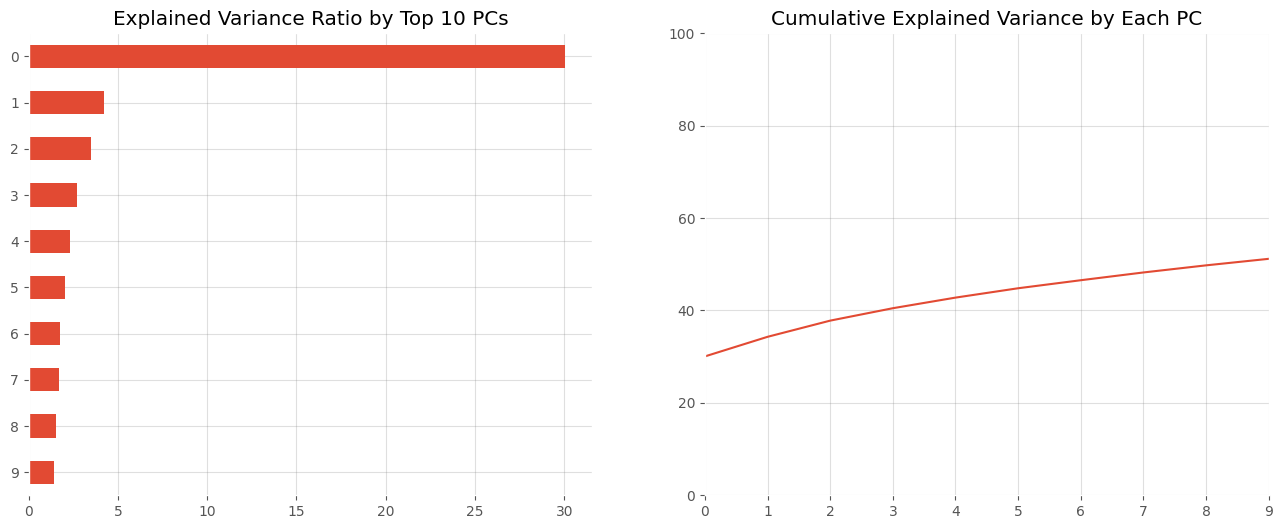

In [23]:
missing_data_rate = 0.3
train_ratio = 0.75
Num_Eigen = 10
Num_Components = 4
pca_result =\
    PCA_portfolios(data2, missing_data_rate,
                   train_ratio, Num_Eigen, Num_Components)

In [24]:
pca_result[2]

Return         Vol         Sharpe
80           inf  126.605790  1.797693e+308
59  2.604657e+77   60.772300   4.285928e+75
10  4.074036e+22   34.369358   1.185369e+21
3   1.706282e+00    0.721368   2.365340e+00
0   2.650992e-01    0.116307   2.279304e+00
9   8.858034e-01    0.436770   2.028077e+00
1   6.279320e-01    0.518502   1.211049e+00
68  1.528517e+00    2.431811   6.285507e-01
69  3.826879e-01    0.761196   5.027456e-01
71  4.743247e-01    2.157385   2.198609e-01

In [25]:
# Yet another gift

def backtest_PCA_porfolios(data_list):
    X_Test_Raw = data_list[3]
    X_Test = data_list[4]
    for i in range(len(data_list[2])):
        stock_tickers = list(data_list[1].columns)
        eigen = data_list[0][data_list[2].index[i]]

        eigen_prtfi =\
            (
                pd
                .DataFrame(data = {"weights": eigen.squeeze()
                                  },
                           index = stock_tickers)
            )

        eigen_prtfi.sort_values(by = ["weights"],
                                ascending = False,
                                inplace = True)

        eigen_prtfi_returns =\
        (
            np
            .dot(X_Test_Raw
                 .loc[ : , eigen_prtfi.index],
                 eigen)
        )
        eigen_portfolio_returns =\
        (
            pd
            .Series(eigen_prtfi_returns.squeeze(),
                    index = X_Test_Raw.index)
        )

        returns, vol, sharpe = calculate_sharpe_ratio(eigen_portfolio_returns)

        print("Our PCA-based Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f"  %
              (returns * 100, vol * 100, sharpe)
             )

        # Compared with what? Equal-weightage Portfolio

        equal_weight_return =\
        (
            X_Test_Raw * (1 / int(X_Test_Raw.shape[1])
                         )
        ).sum(axis = 1)
        df_plot =\
            (
                pd
                .DataFrame({f"ML Portfolio by weightage_{data_list[2].index[i]} Return":
                                eigen_portfolio_returns,
                            "Equal Weight Index": 
                                equal_weight_return},
                          index = X_Test.index
                          )
            )

        (
            np
            .cumprod(df_plot + 1)
            .plot(title = f"Returns of the equal weighted index vs. Eigen-Portfolio_{i}",
                  figsize = [16, 8]
                 )
        )
        plt.show()
    return

Our PCA-based Portfolio:
Return = nan%
Volatility = 13052.37%
Sharpe = nan


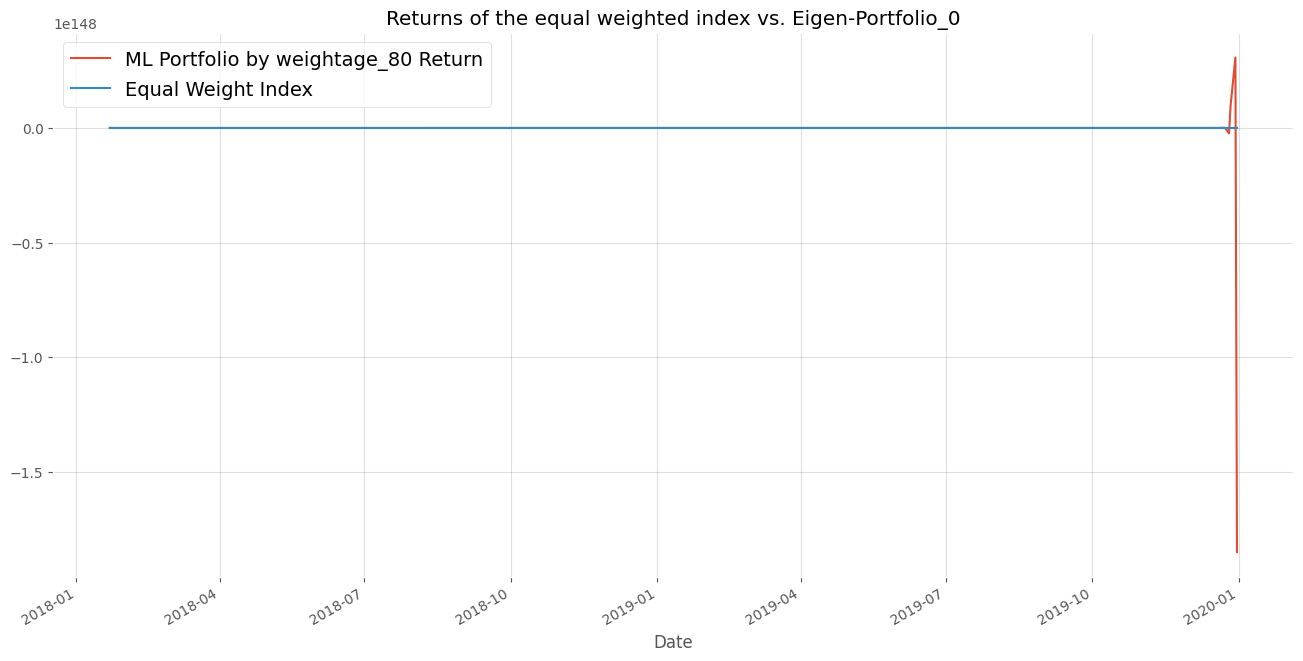

Our PCA-based Portfolio:
Return = 320637500342052175910823062319775748010058857815455459494501605024796039613295760422993920.00%
Volatility = 6171.46%
Sharpe = 51954851641272728259999671633885023556985633553788411716957136636565958804945791614976.00


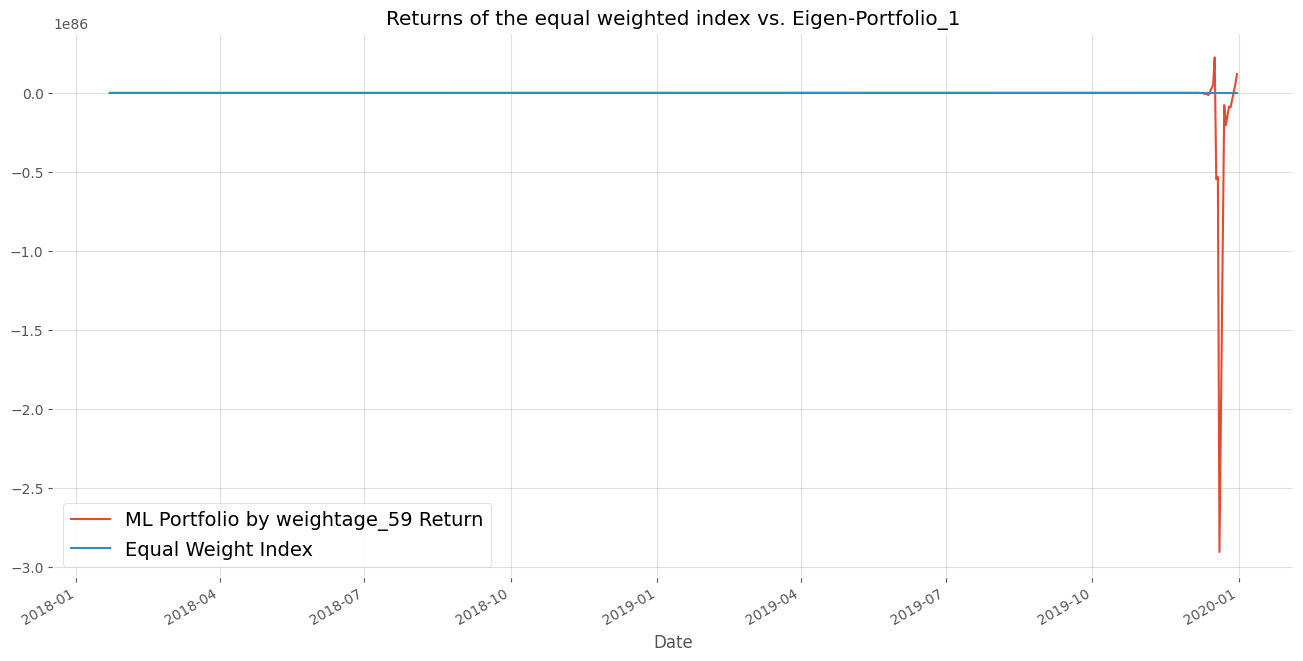

Our PCA-based Portfolio:
Return = nan%
Volatility = 3431.05%
Sharpe = nan


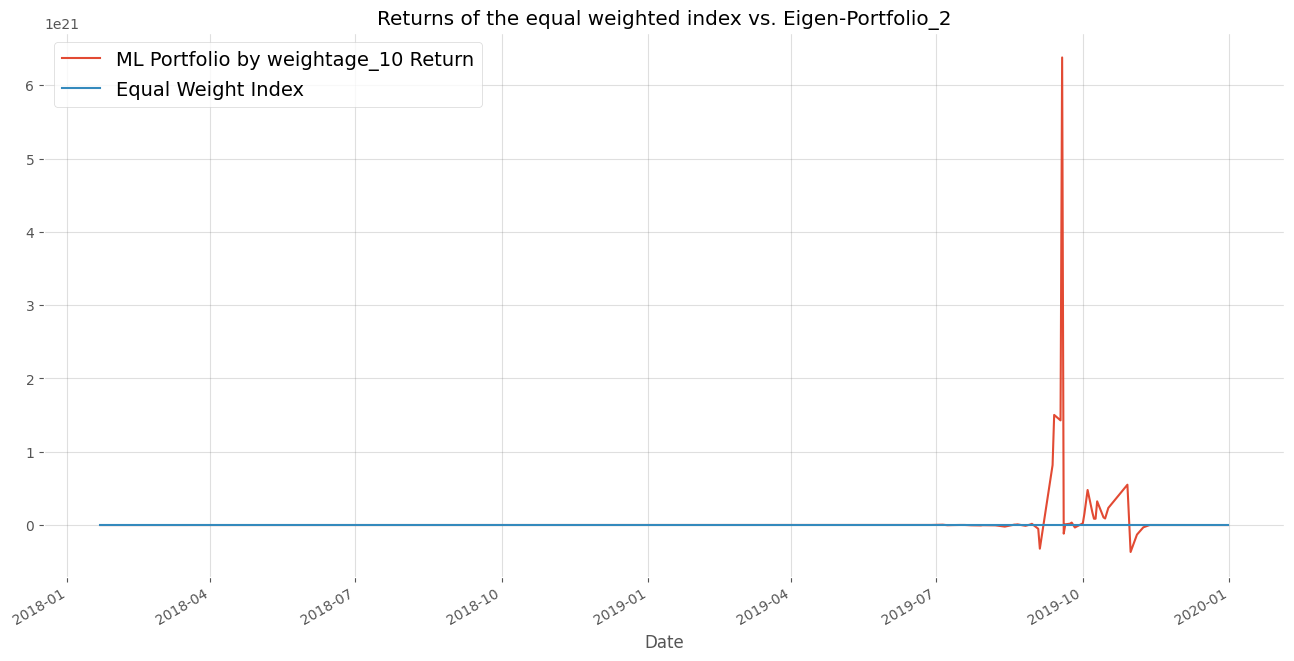

Our PCA-based Portfolio:
Return = -55.65%
Volatility = 72.21%
Sharpe = -0.77


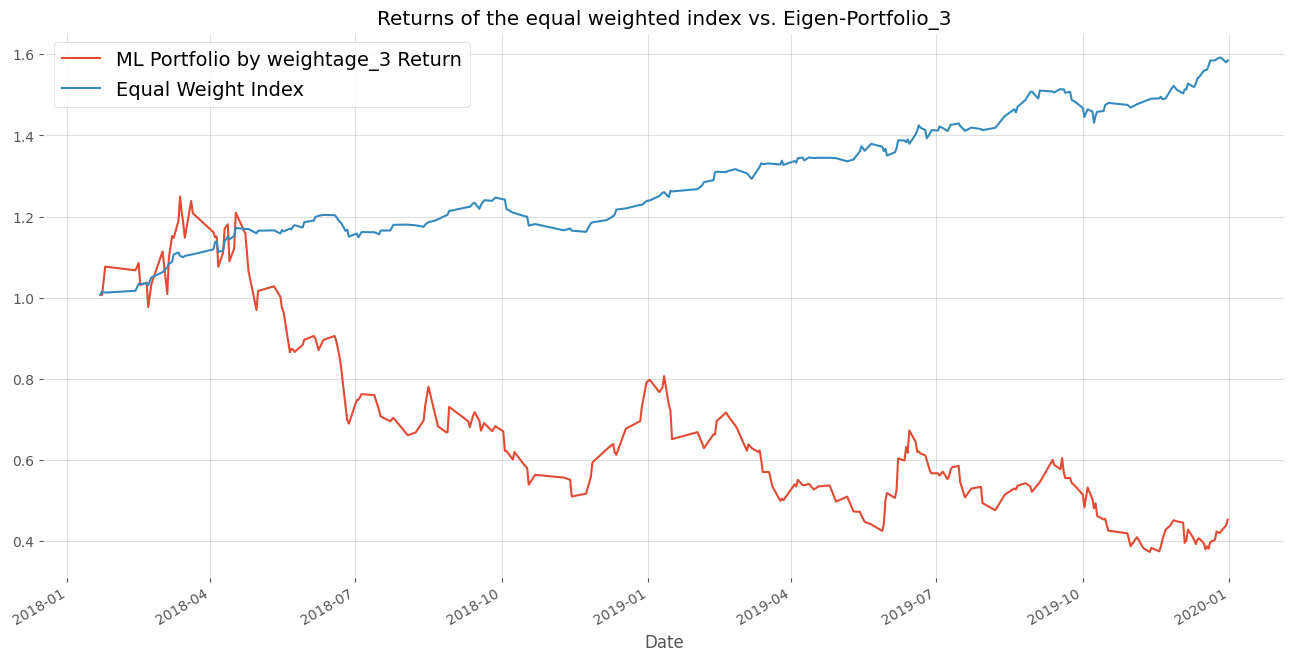

Our PCA-based Portfolio:
Return = 61.32%
Volatility = 11.99%
Sharpe = 5.11


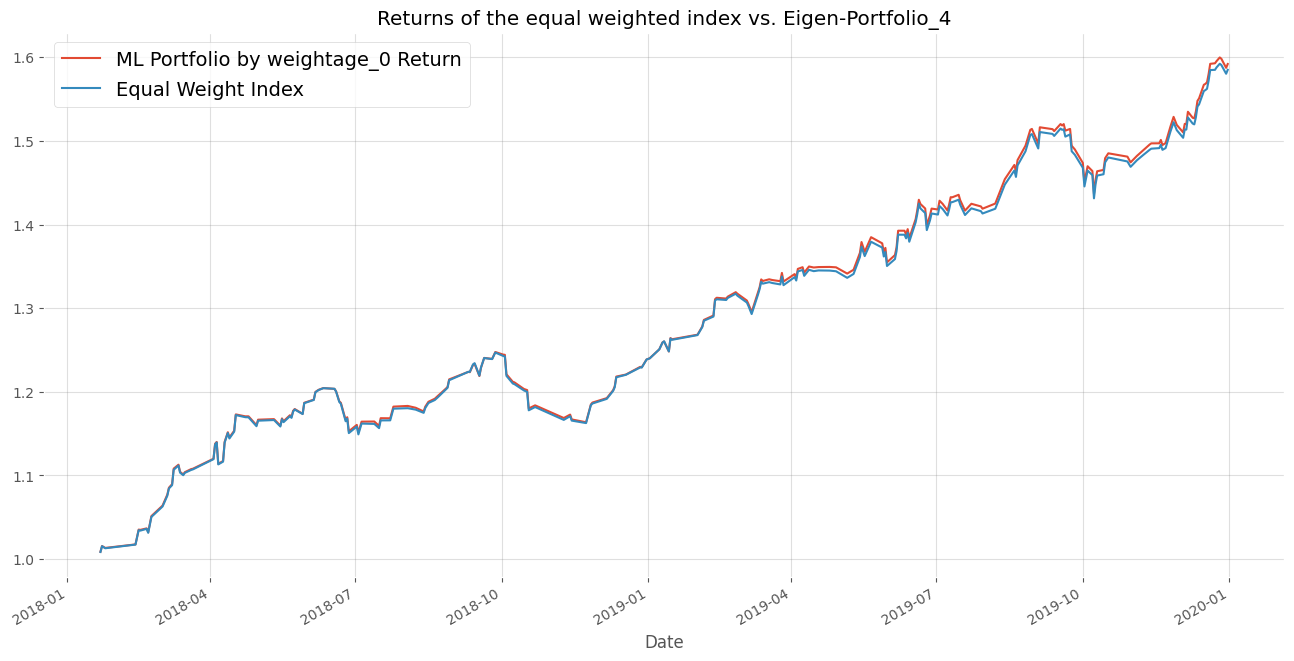

Our PCA-based Portfolio:
Return = 41.37%
Volatility = 48.20%
Sharpe = 0.86


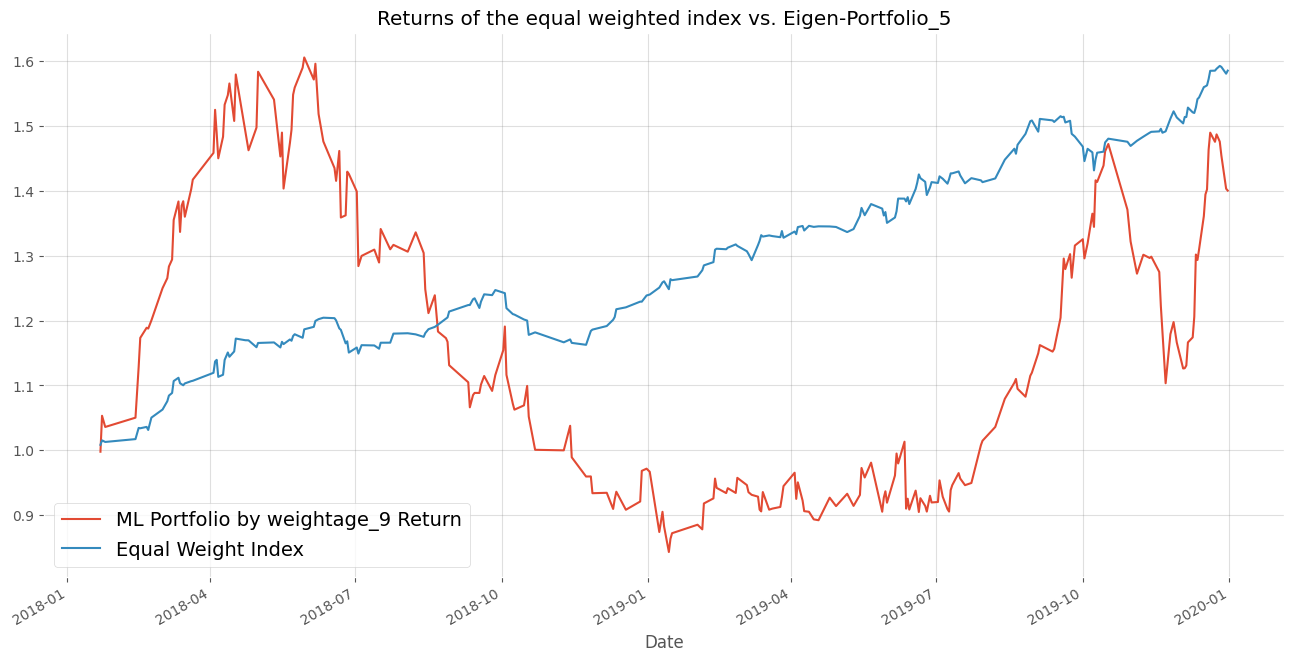

Our PCA-based Portfolio:
Return = 137.76%
Volatility = 48.41%
Sharpe = 2.85


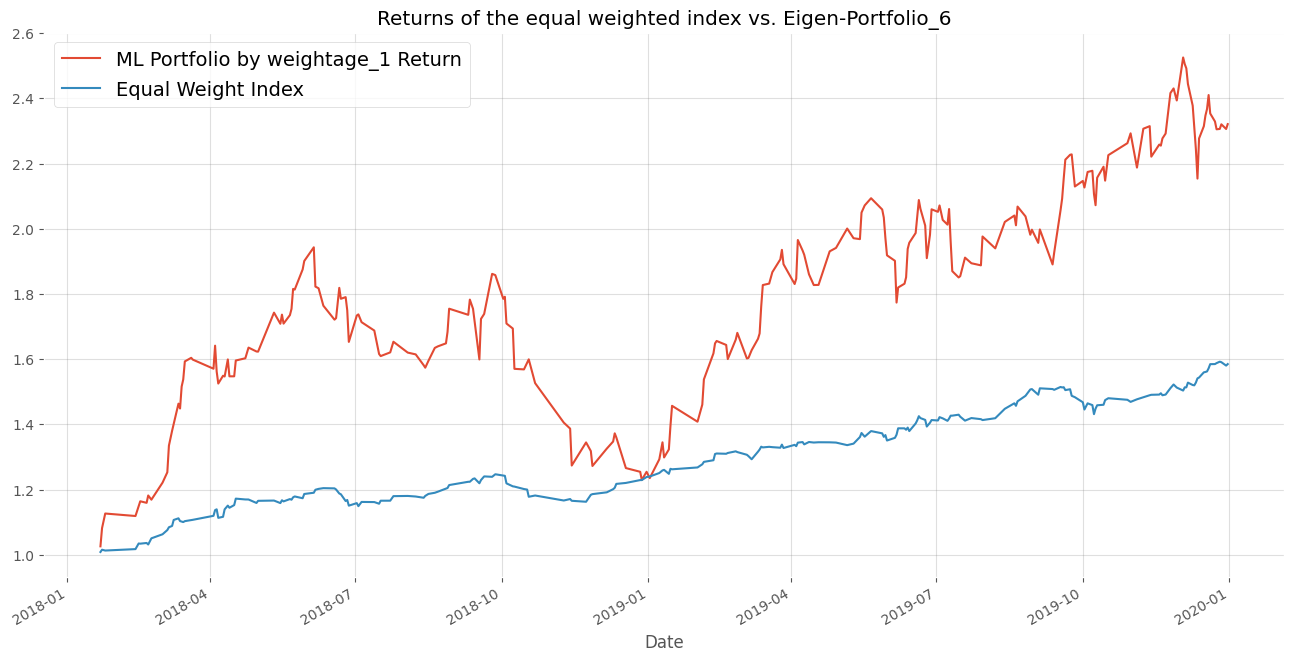

Our PCA-based Portfolio:
Return = -98.27%
Volatility = 227.99%
Sharpe = -0.43


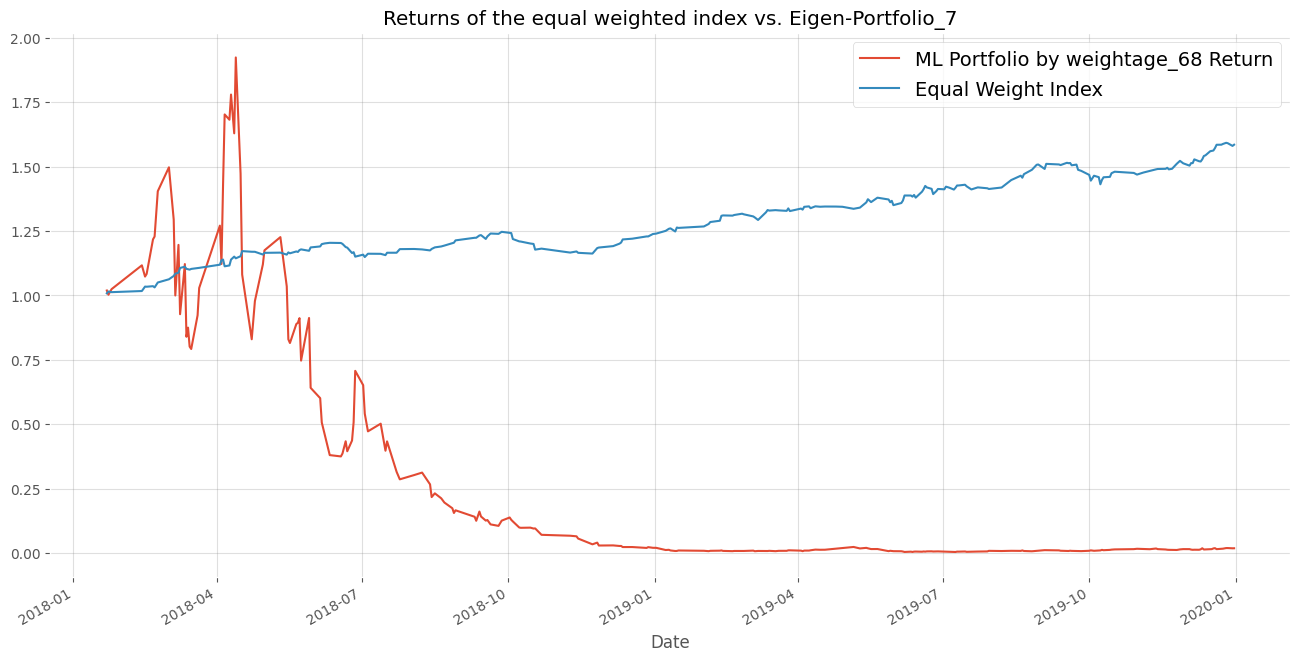

Our PCA-based Portfolio:
Return = 46.29%
Volatility = 83.31%
Sharpe = 0.56


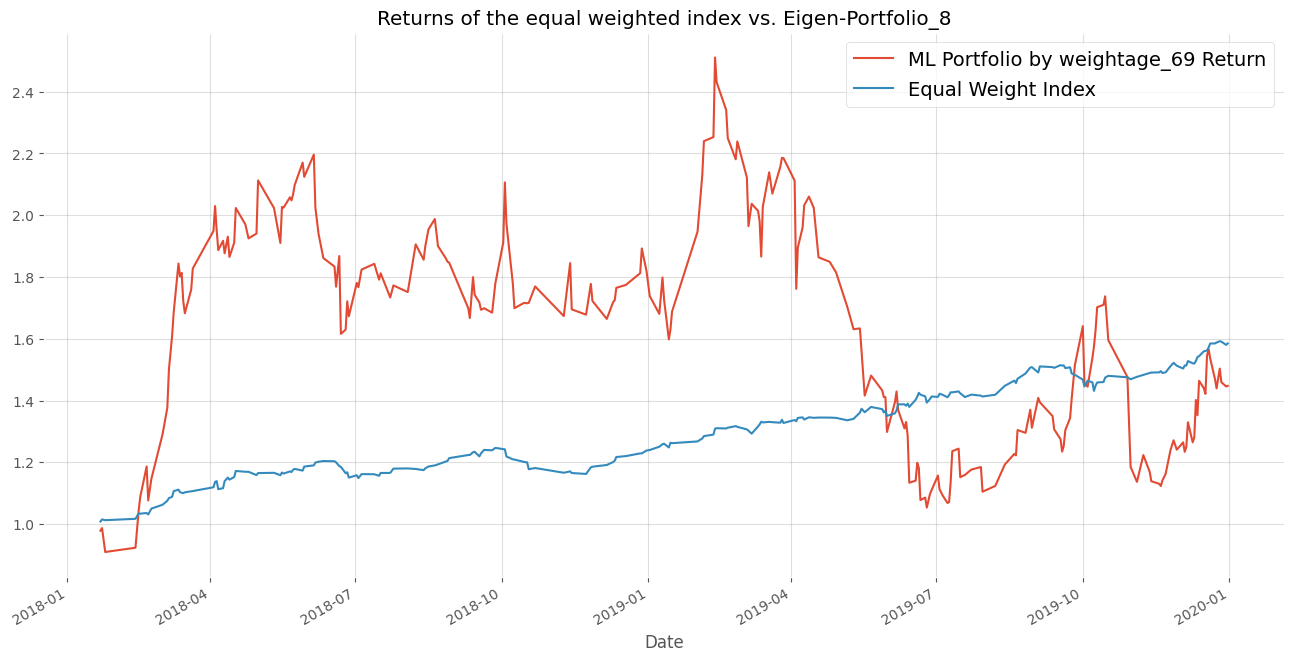

Our PCA-based Portfolio:
Return = -55.50%
Volatility = 204.93%
Sharpe = -0.27


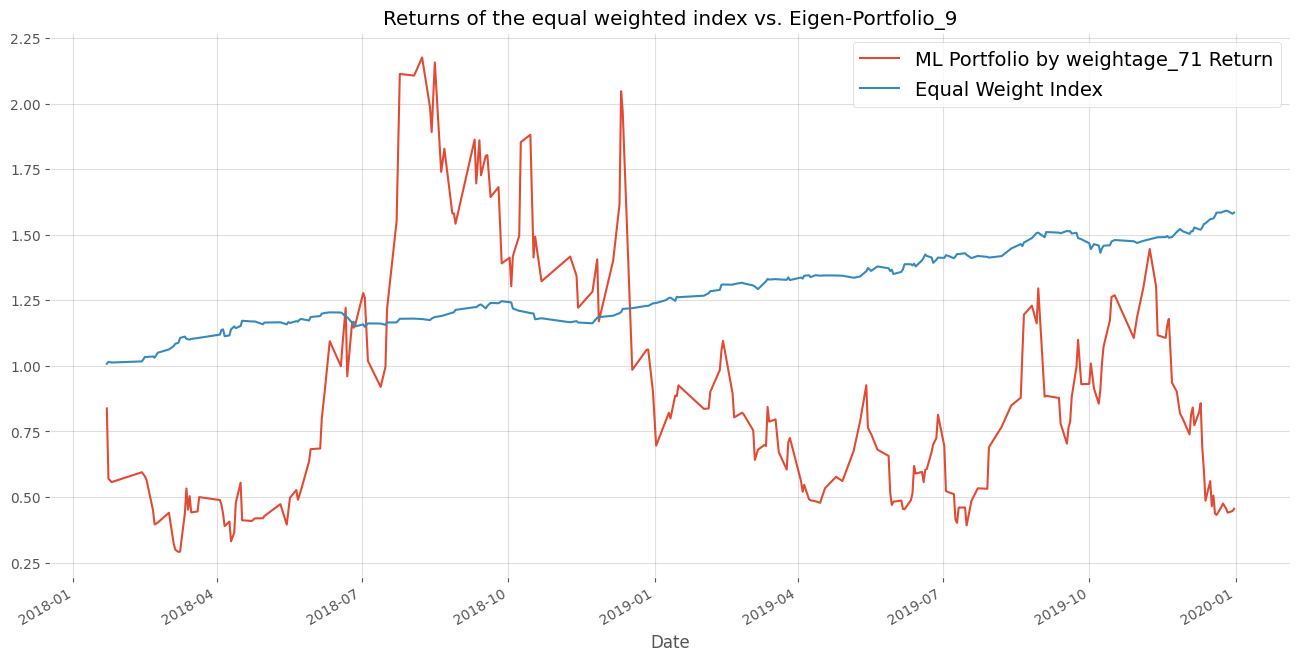

In [26]:
backtest_PCA_porfolios(pca_result)

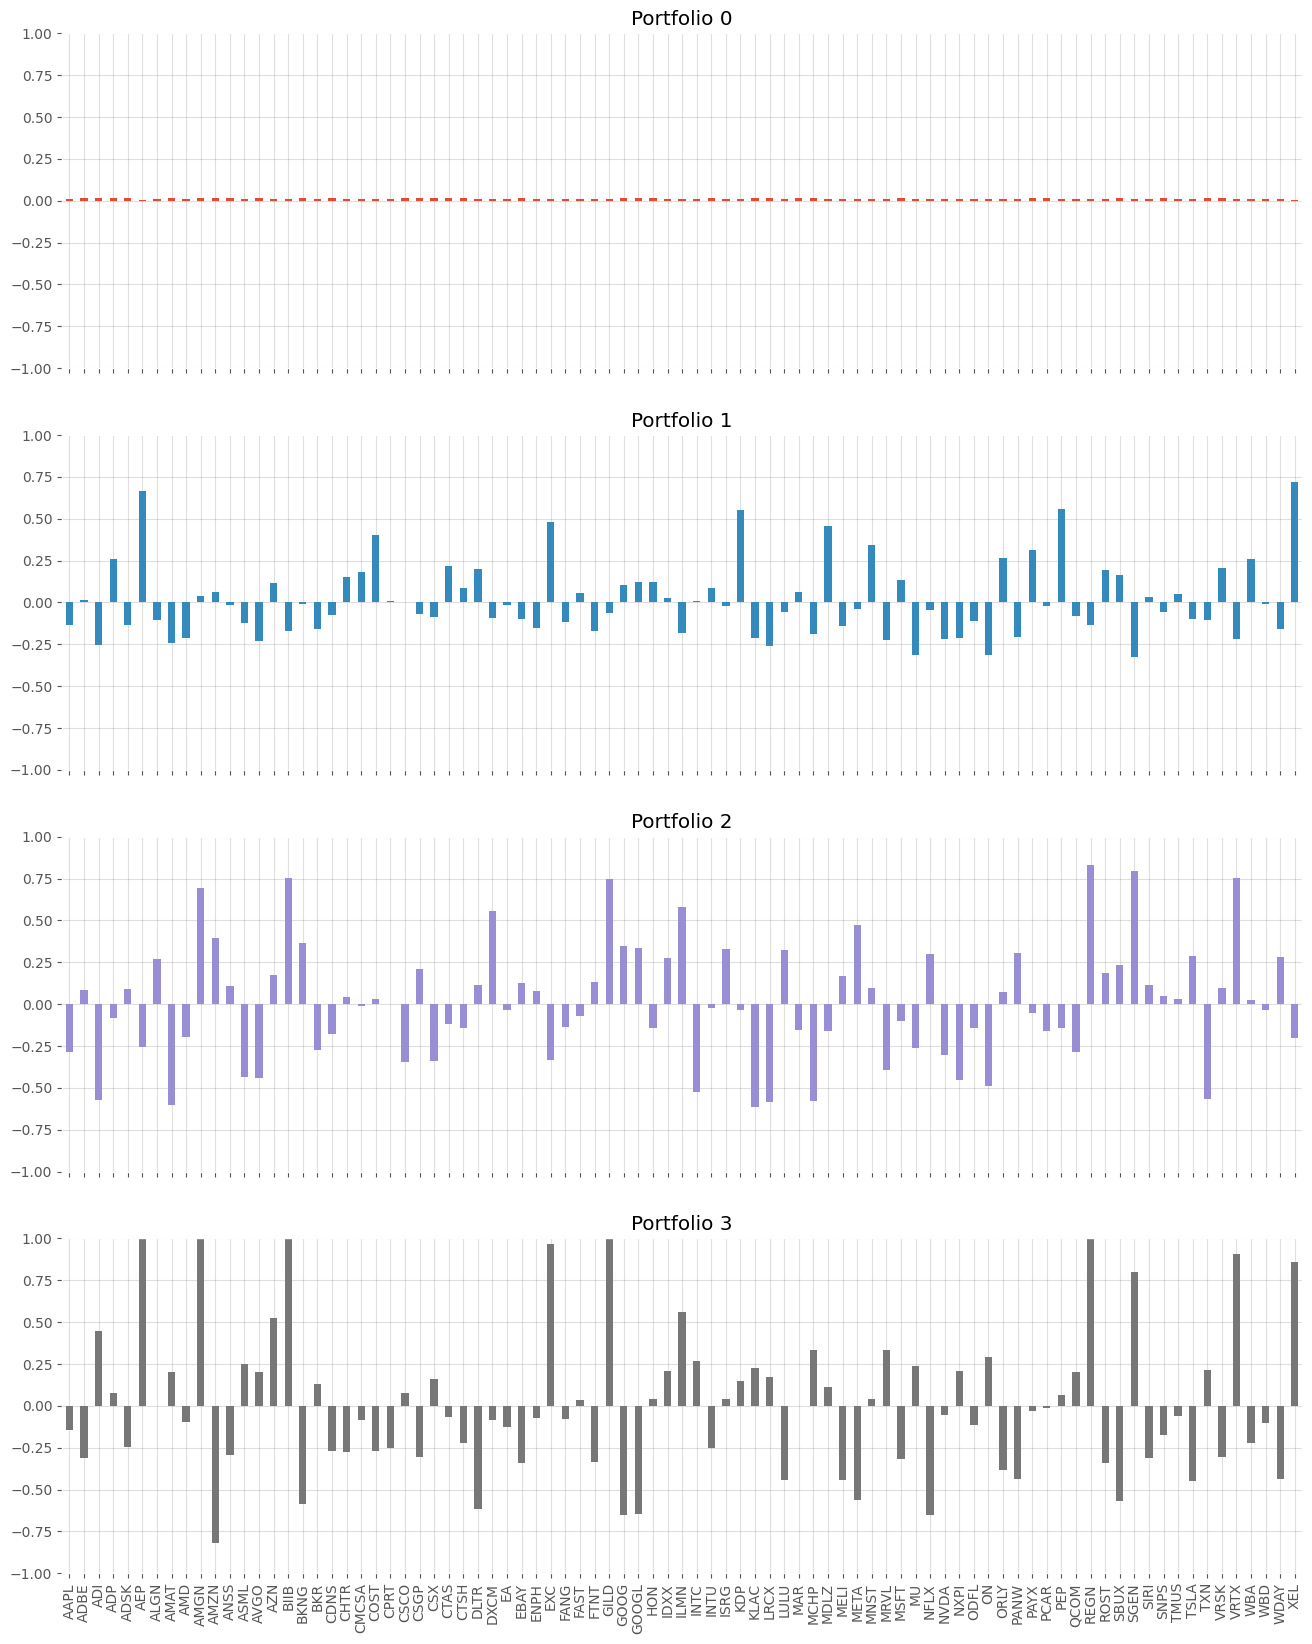

In [27]:
view_eigen_portfolios(pca_result[1], 4)

the eigan portfolio 5 would be preferred, based on 4 PCA components utilised.The optimal weights vector at positon 1 show as below:

In [28]:
pca_result[0][1]

array([-0.134,  0.014, -0.253,  0.258, -0.138,  0.665, -0.106, -0.245,
       -0.213,  0.036,  0.061, -0.014, -0.124, -0.233,  0.117, -0.172,
       -0.011, -0.16 , -0.077,  0.15 ,  0.181,  0.404,  0.009,  0.002,
       -0.067, -0.085,  0.217,  0.088,  0.201, -0.09 , -0.016, -0.101,
       -0.156,  0.48 , -0.118,  0.056, -0.17 , -0.061,  0.104,  0.12 ,
        0.121,  0.024, -0.18 ,  0.009,  0.085, -0.023,  0.55 , -0.214,
       -0.258, -0.054,  0.059, -0.187,  0.454, -0.143, -0.039,  0.346,
       -0.225,  0.132, -0.313, -0.046, -0.216, -0.211, -0.11 , -0.317,
        0.267, -0.204,  0.315, -0.023,  0.555, -0.083, -0.138,  0.194,
        0.164, -0.327,  0.033, -0.055,  0.053, -0.097, -0.107,  0.203,
       -0.22 ,  0.258, -0.011, -0.158,  0.719])

### <font color = blue> 👉 Questions 3. Using `pandas.datareader`, extract the stock prices of the following ticker symbols, between July 2015 and June 2019.

- General Motors `GM`
- Marriott `MAR`
- Pfizer `PFE`
- ExxonMobil `XOM`
- The Walt Disney Company `DIS`
- Bank of America `BAC`
- Proctor & Gamble `PG`
- Hilton `HLT`
- Walmart `WMT`
- Twitter `TWTR`

### Then, calculate simple daily percentage changes in the stock prices, and store them into an object, printing the results into an output cell.

### Below are the lines of code that lead to an answer:

In [29]:
tickers3 = ['GM', 'MAR', 'PFE', 'XOM', 'DIS', 'BAC', 'PG', 'HLT', 'WMT', 'X']
raw3 = yf.download(tickers3, start="2015-07-01", end="2019-07-01")

[*********************100%%**********************]  10 of 10 completed


In [30]:
data3 = clean_dataset(raw3[[('Adj Close')]].droplevel(0, axis = 1), 0.3)
data3.to_csv("PS9_Q3_data_clean.csv")

Missing Values? = False


### <font color = red> Answer 3 is presented in the cell below: </font>

In [31]:
Daily_Linear_Return =\
    (
        data3
        .pct_change(1)
    )
Daily_Linear_Return.dropna(inplace = True)
Daily_Linear_Return

BAC       DIS        GM       HLT       MAR       PFE  \
Date                                                                     
2015-07-02 -0.011034 -0.001390  0.005751  0.000000 -0.002534 -0.009498   
2015-07-06 -0.005285  0.006350 -0.017454  0.000720 -0.006551 -0.003596   
2015-07-07 -0.014758  0.012100  0.006432  0.001798  0.015207  0.014436   
2015-07-08 -0.026363 -0.016311 -0.050822 -0.022980 -0.019618 -0.008301   
2015-07-09  0.014154  0.003559 -0.005771  0.002573  0.002975  0.012257   
...              ...       ...       ...       ...       ...       ...   
2019-06-24 -0.004979 -0.007202  0.001083 -0.006553 -0.002262  0.002061   
2019-06-25 -0.007863  0.005172  0.019481 -0.023662 -0.025446  0.000000   
2019-06-26  0.005403  0.003287  0.011943  0.013619  0.017782 -0.017596   
2019-06-27  0.010749 -0.007835  0.004983  0.021265  0.019462  0.010235   
2019-06-28  0.028004  0.002441  0.005480  0.012535  0.014462 -0.002533   

                  PG       WMT         X       XOM  
Date                                                
2015-07-02  0.002634 -0.000279 -0.035592  0.009348  
2015-07-06  0.001502  0.009324 -0.005562 -0.007337  
2015-07-07  0.020862  0.017372  0.016269  0.004119  
2015-07-08 -0.008933 -0.009893 -0.041521 -0.010860  
2015-07-09 -0.004074 -0.003833 -0.012004 -0.004514  
...              ...       ...       ...       ...  
2019-06-24  0.010162  0.000990 -0.014997 -0.009525  
2019-06-25 -0.005430 -0.004674  0.033218 -0.008837  
2019-06-26 -0.017812 -0.005058  0.021433  0.004327  
2019-06-27  0.000455 -0.000544 -0.009180 -0.010183  
2019-06-28 -0.001184  0.003542  0.013236  0.010683  

[1005 rows x 10 columns]

### <font color = blue> 👉 Questions 4. Using a box-and-whisker plot, compare the performance of the stocks over the given period of time. Find the stock with the highest variability and risk, based on the visualization.

### Below are the lines of code that lead to an answer:

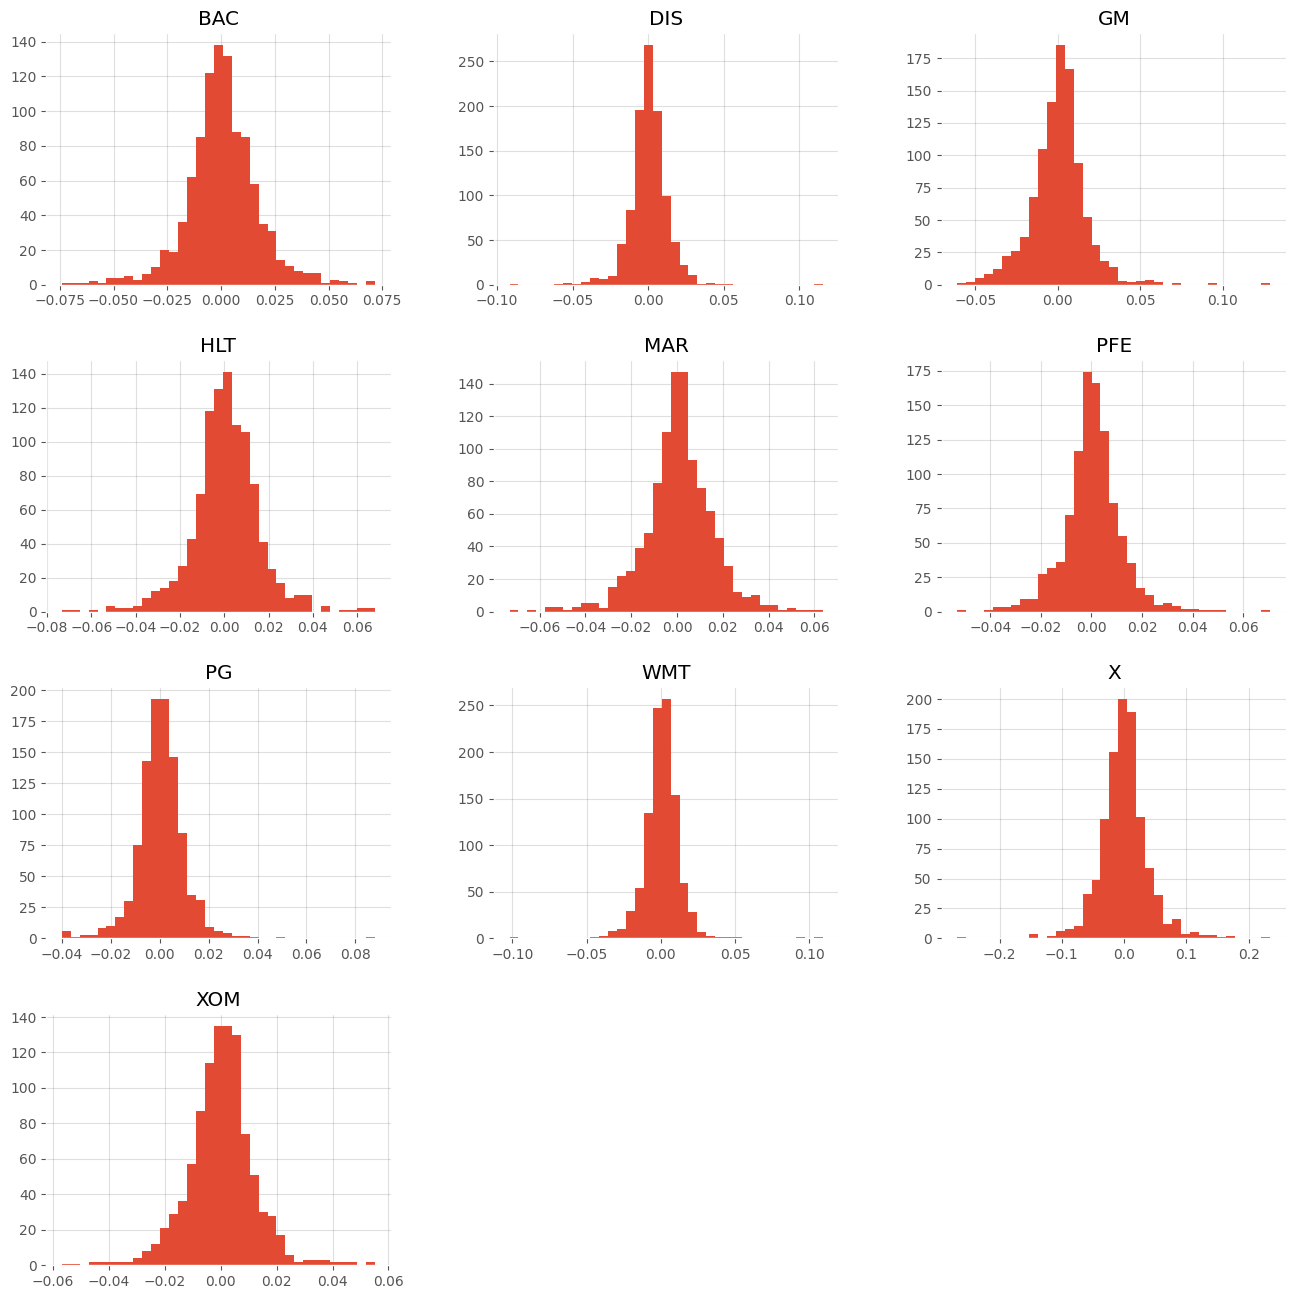

In [32]:
# Team, note that historam is not robust

(Daily_Linear_Return
 .hist(bins = 35,
       sharex = False,
       sharey = False,
       figsize =[16, 16]
      )
)
plt.show()

Normalized scaler is useful for data clustering, but not obvious for visual comparison

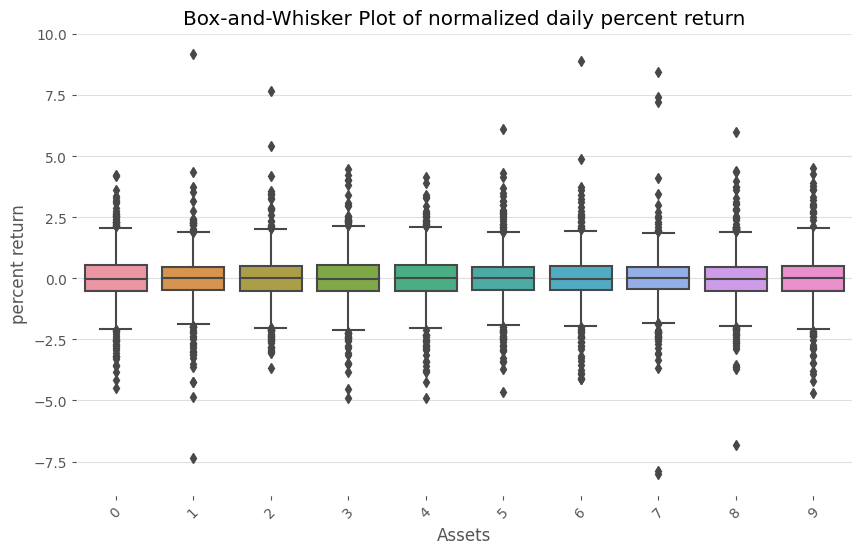

In [33]:
scaler = StandardScaler()
scaled_daily_return = scaler.fit_transform(Daily_Linear_Return)
# Create a box-and-whisker plot for the scaled data
plt.figure(figsize=(10, 6))
sns.boxplot(data=scaled_daily_return)
plt.title("Box-and-Whisker Plot of normalized daily percent return")
plt.xlabel("Assets")
plt.ylabel("percent return")
plt.xticks(rotation=45)
plt.show()

### <font color = red> Answer 4 is presented in the cell below: </font>

From the box plot below, twitter, now known as "X", have larger variablity among all assets of interest

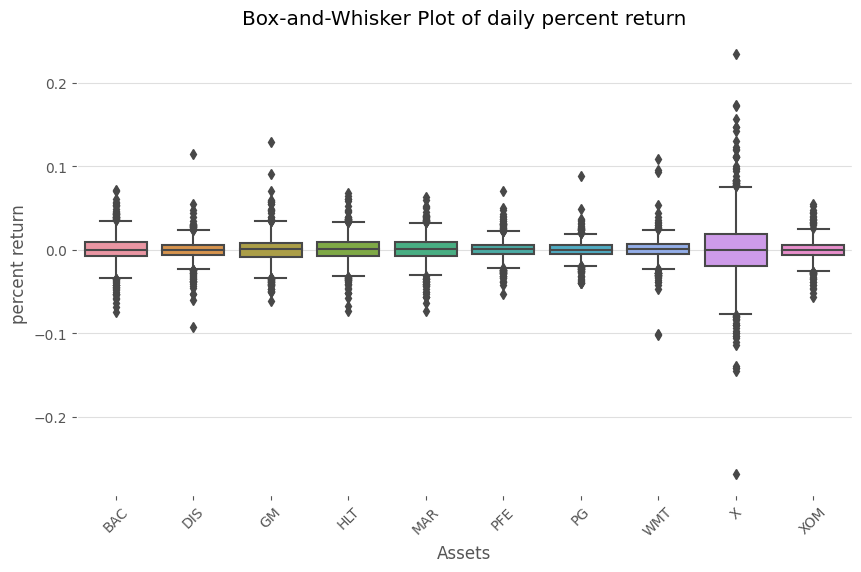

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=Daily_Linear_Return)
plt.title("Box-and-Whisker Plot of daily percent return")
plt.xlabel("Assets")
plt.ylabel("percent return")
plt.xticks(rotation=45)
plt.show()

### <font color = blue> 👉 Questions 5. Create your own function to compare daily percentage changes between stocks, using a scatter plot and its distribution relative to a perfect diagonal (regression line). 

### Assess which of the following pairs seem to show the closest relationships.

1. ExxonMobil (`XOM`) and General Motors (`GM`)
2. Twitter (`TWTR`) and The Walt Disney Company (`DIS`)
3. Marriott (`MAR`) and Hilton (`HLT`)
4. Pfeizer (`PFE`) and Proctor & Gamble (`PG`)
5. Bank of America (`BAC`) and Walmart (`WMT`)

### Upon completion of the above, please execute more tasks for the sake of this question. 

### As you have learned in class, if you wish to look for all combinations of stocks you can use the scatter matrix graph provided by the `pandas` module. Create the scatter matrix, along with a Kernel Density Estimation on the diagonal.

### Below are the lines of code that lead to an answer:

In [35]:
def err_histogram(err_results, N):
    plt.hist(err_results,weights = np.ones(len(err_results))/len(err_results),
             bins = np.linspace(-2,2,40))
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.title(f'Hedging Error for N = {N}')
    plt.xlabel('Hedging Error')
    plt.ylabel('Frequency')
    plt.yticks(np.arange(0,0.3,0.05))
    plt.savefig(f'Hedging Error for N = {N}.png')
    plt.show()
    return

In [36]:
def daily_pct_ols(two_pct_return):
    # Add a constant term to the independent variable (intercept)
    X = sm.add_constant(two_pct_return.iloc[:, 0])

    # Fit the OLS model
    model = sm.OLS(two_pct_return.iloc[:, 1], X).fit()

    # Get the regression coefficients
    intercept, slope = model.params
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    # Create a scatter plot
    ax1.scatter(two_pct_return.iloc[:, 0],
                two_pct_return.iloc[:, 1],
                color='blue', label='Scatter')

    # Plot the regression line
    ax1.plot(two_pct_return.iloc[:, 0],
             intercept + slope * two_pct_return.iloc[:, 0],
             color='red', label='Regression Line')
    
    difference =\
        two_pct_return.iloc[:, 1] -\
        (intercept + slope * two_pct_return.iloc[:, 0])

    # Set labels and title for the left subplot
    ax1.set_xlabel(f'{two_pct_return.columns[0]}')
    ax1.set_ylabel(f'{two_pct_return.columns[1]}')
    ax1.set_title('Scatter Plot with Regression Line')
    plt.savefig(\
    f'percent return of {two_pct_return.columns[0]} and\
 {two_pct_return.columns[1]} assets.png')
    ax1.legend()

    ax2.hist(difference, bins=40, density=True,
             alpha=0.6, color='skyblue')
    ax2.set_xlabel(f'residuals')
    ax2.set_ylabel(f'frequency in percent')
    ax2.set_title('Histogram on residuals')
    plt.show()
    
    return model

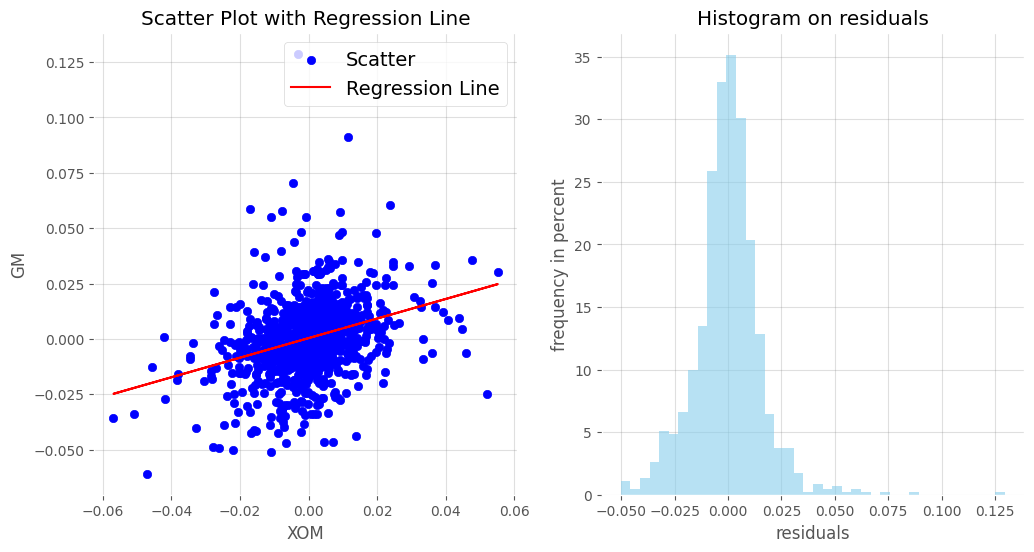

In [37]:
daily_pct_ols(Daily_Linear_Return[['XOM', 'GM']])

In [38]:
pair_list = [['XOM', 'GM'],
             ['X', 'DIS'], 
             ['MAR', 'HLT'], 
             ['PFE', 'PG'], 
             ['BAC', 'WMT']]

In [39]:
def ols_model_batch(df, pairs):
    models = []
    for pair in pairs:
        models += [daily_pct_ols(df[pair])]
        
    return models
    

### <font color = red> Answer 5 is presented in the cell below: </font>

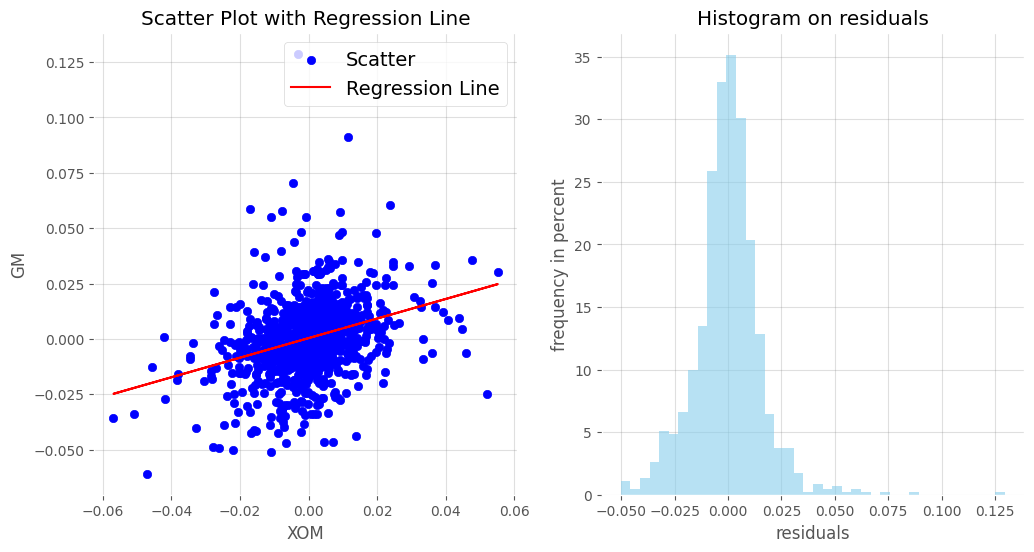

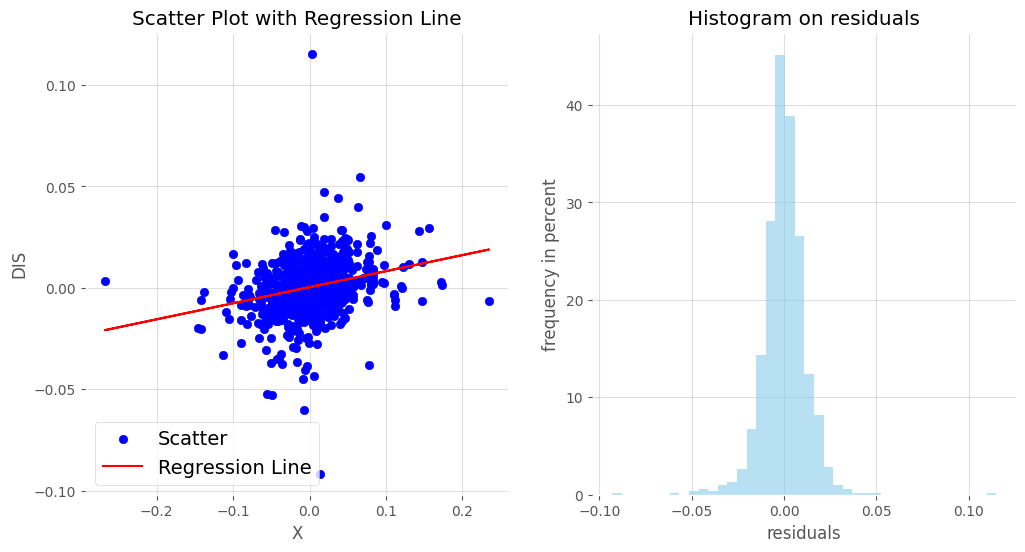

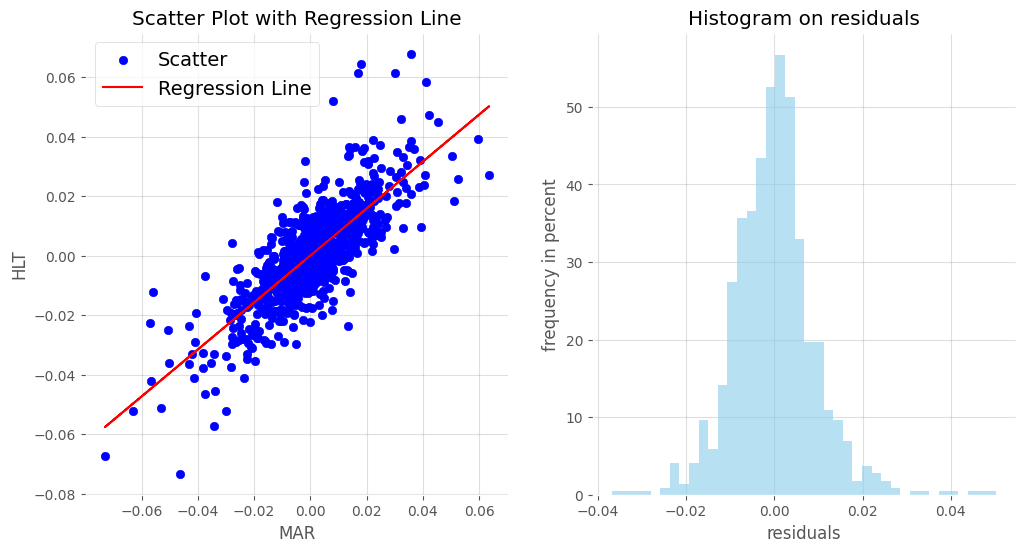

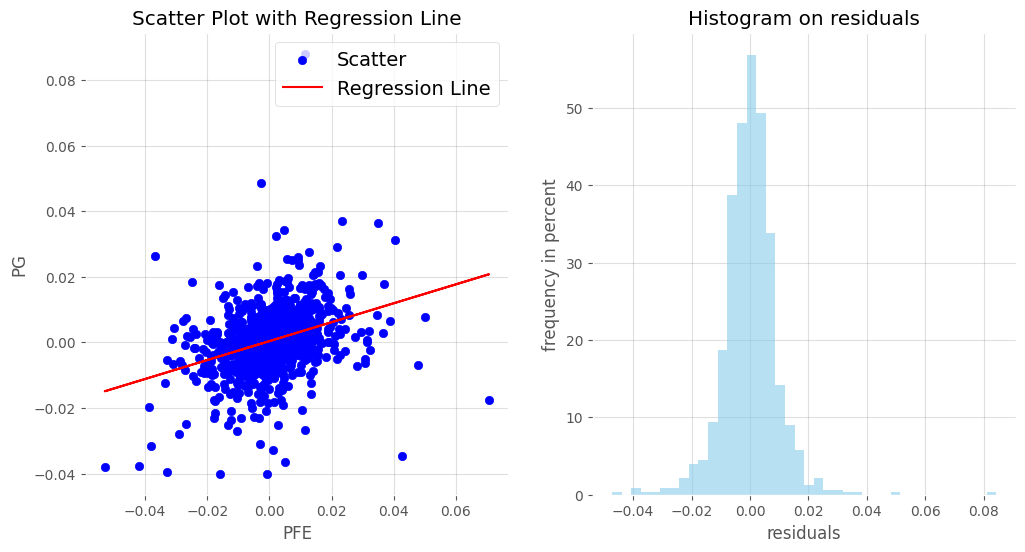

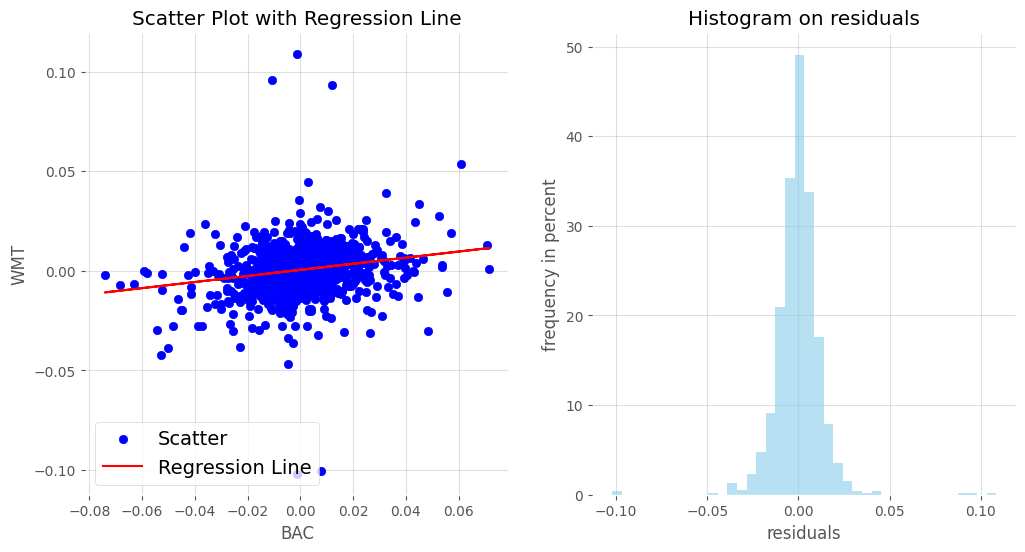

In [40]:
all_ols_model = ols_model_batch(Daily_Linear_Return, pair_list)

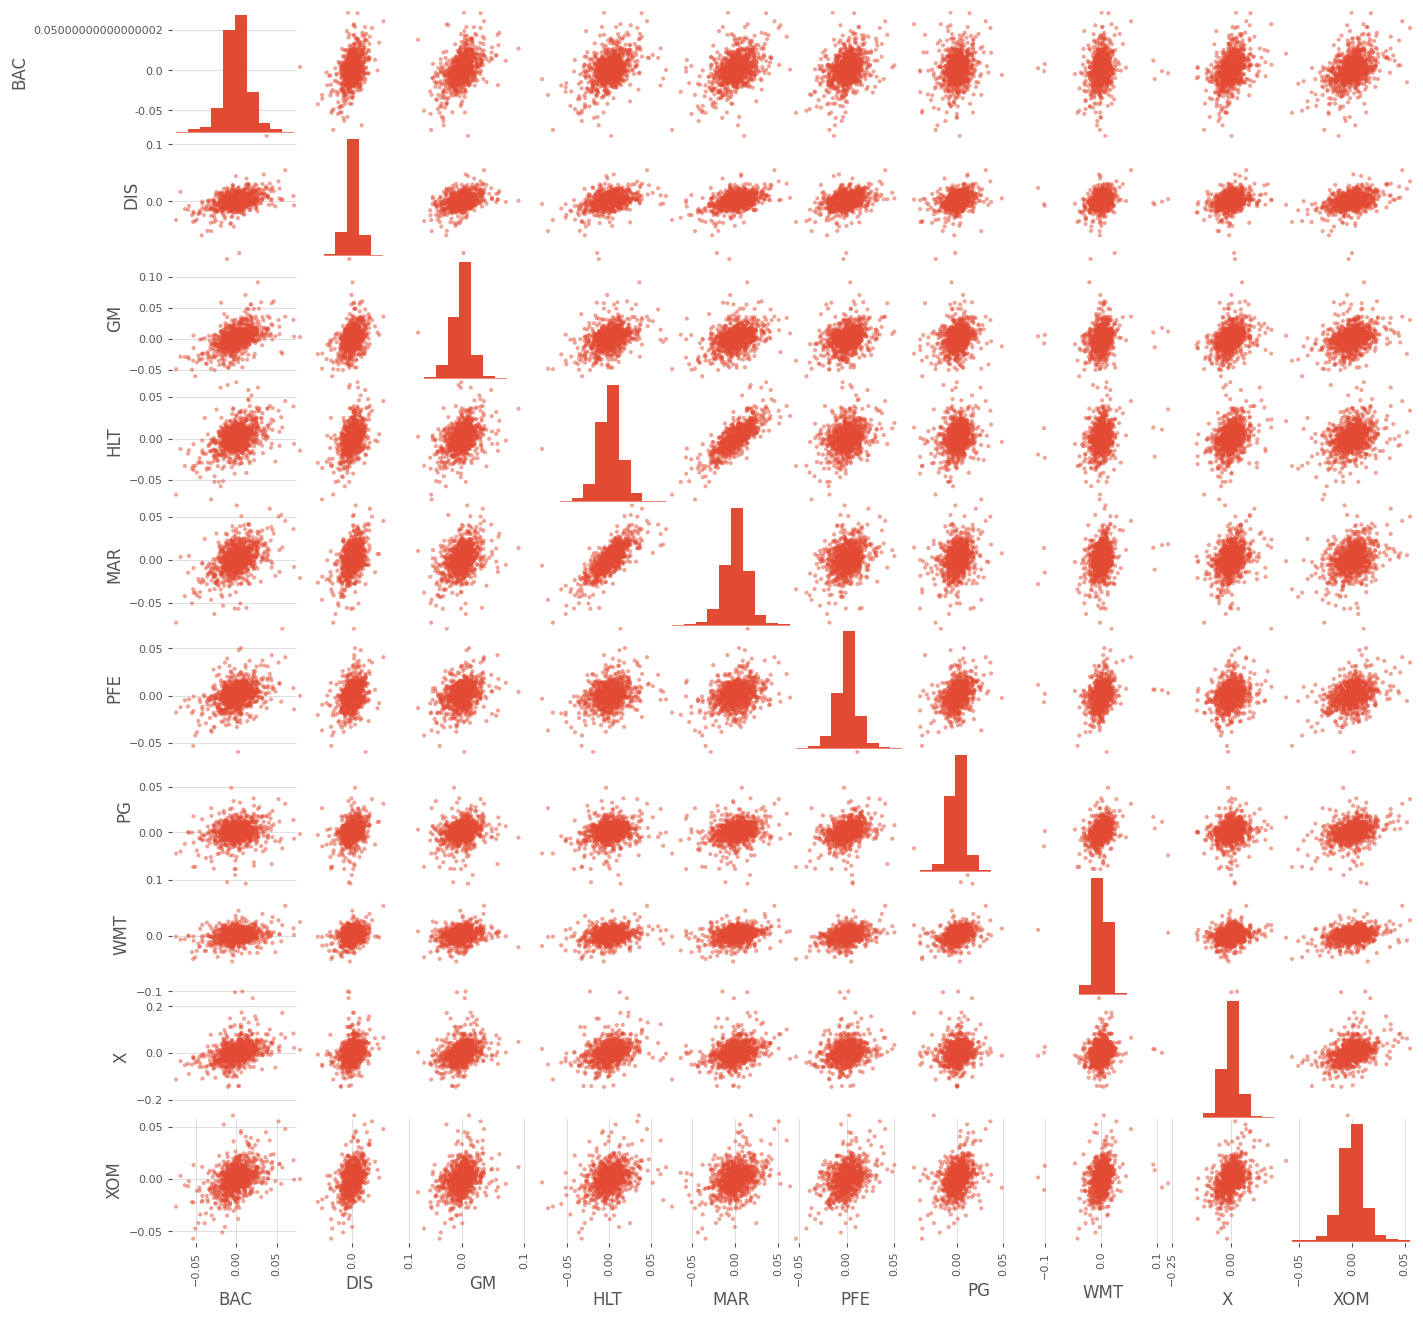

In [41]:
scatter_matrix(Daily_Linear_Return,
               figsize = (16, 16)
              )
plt.show()

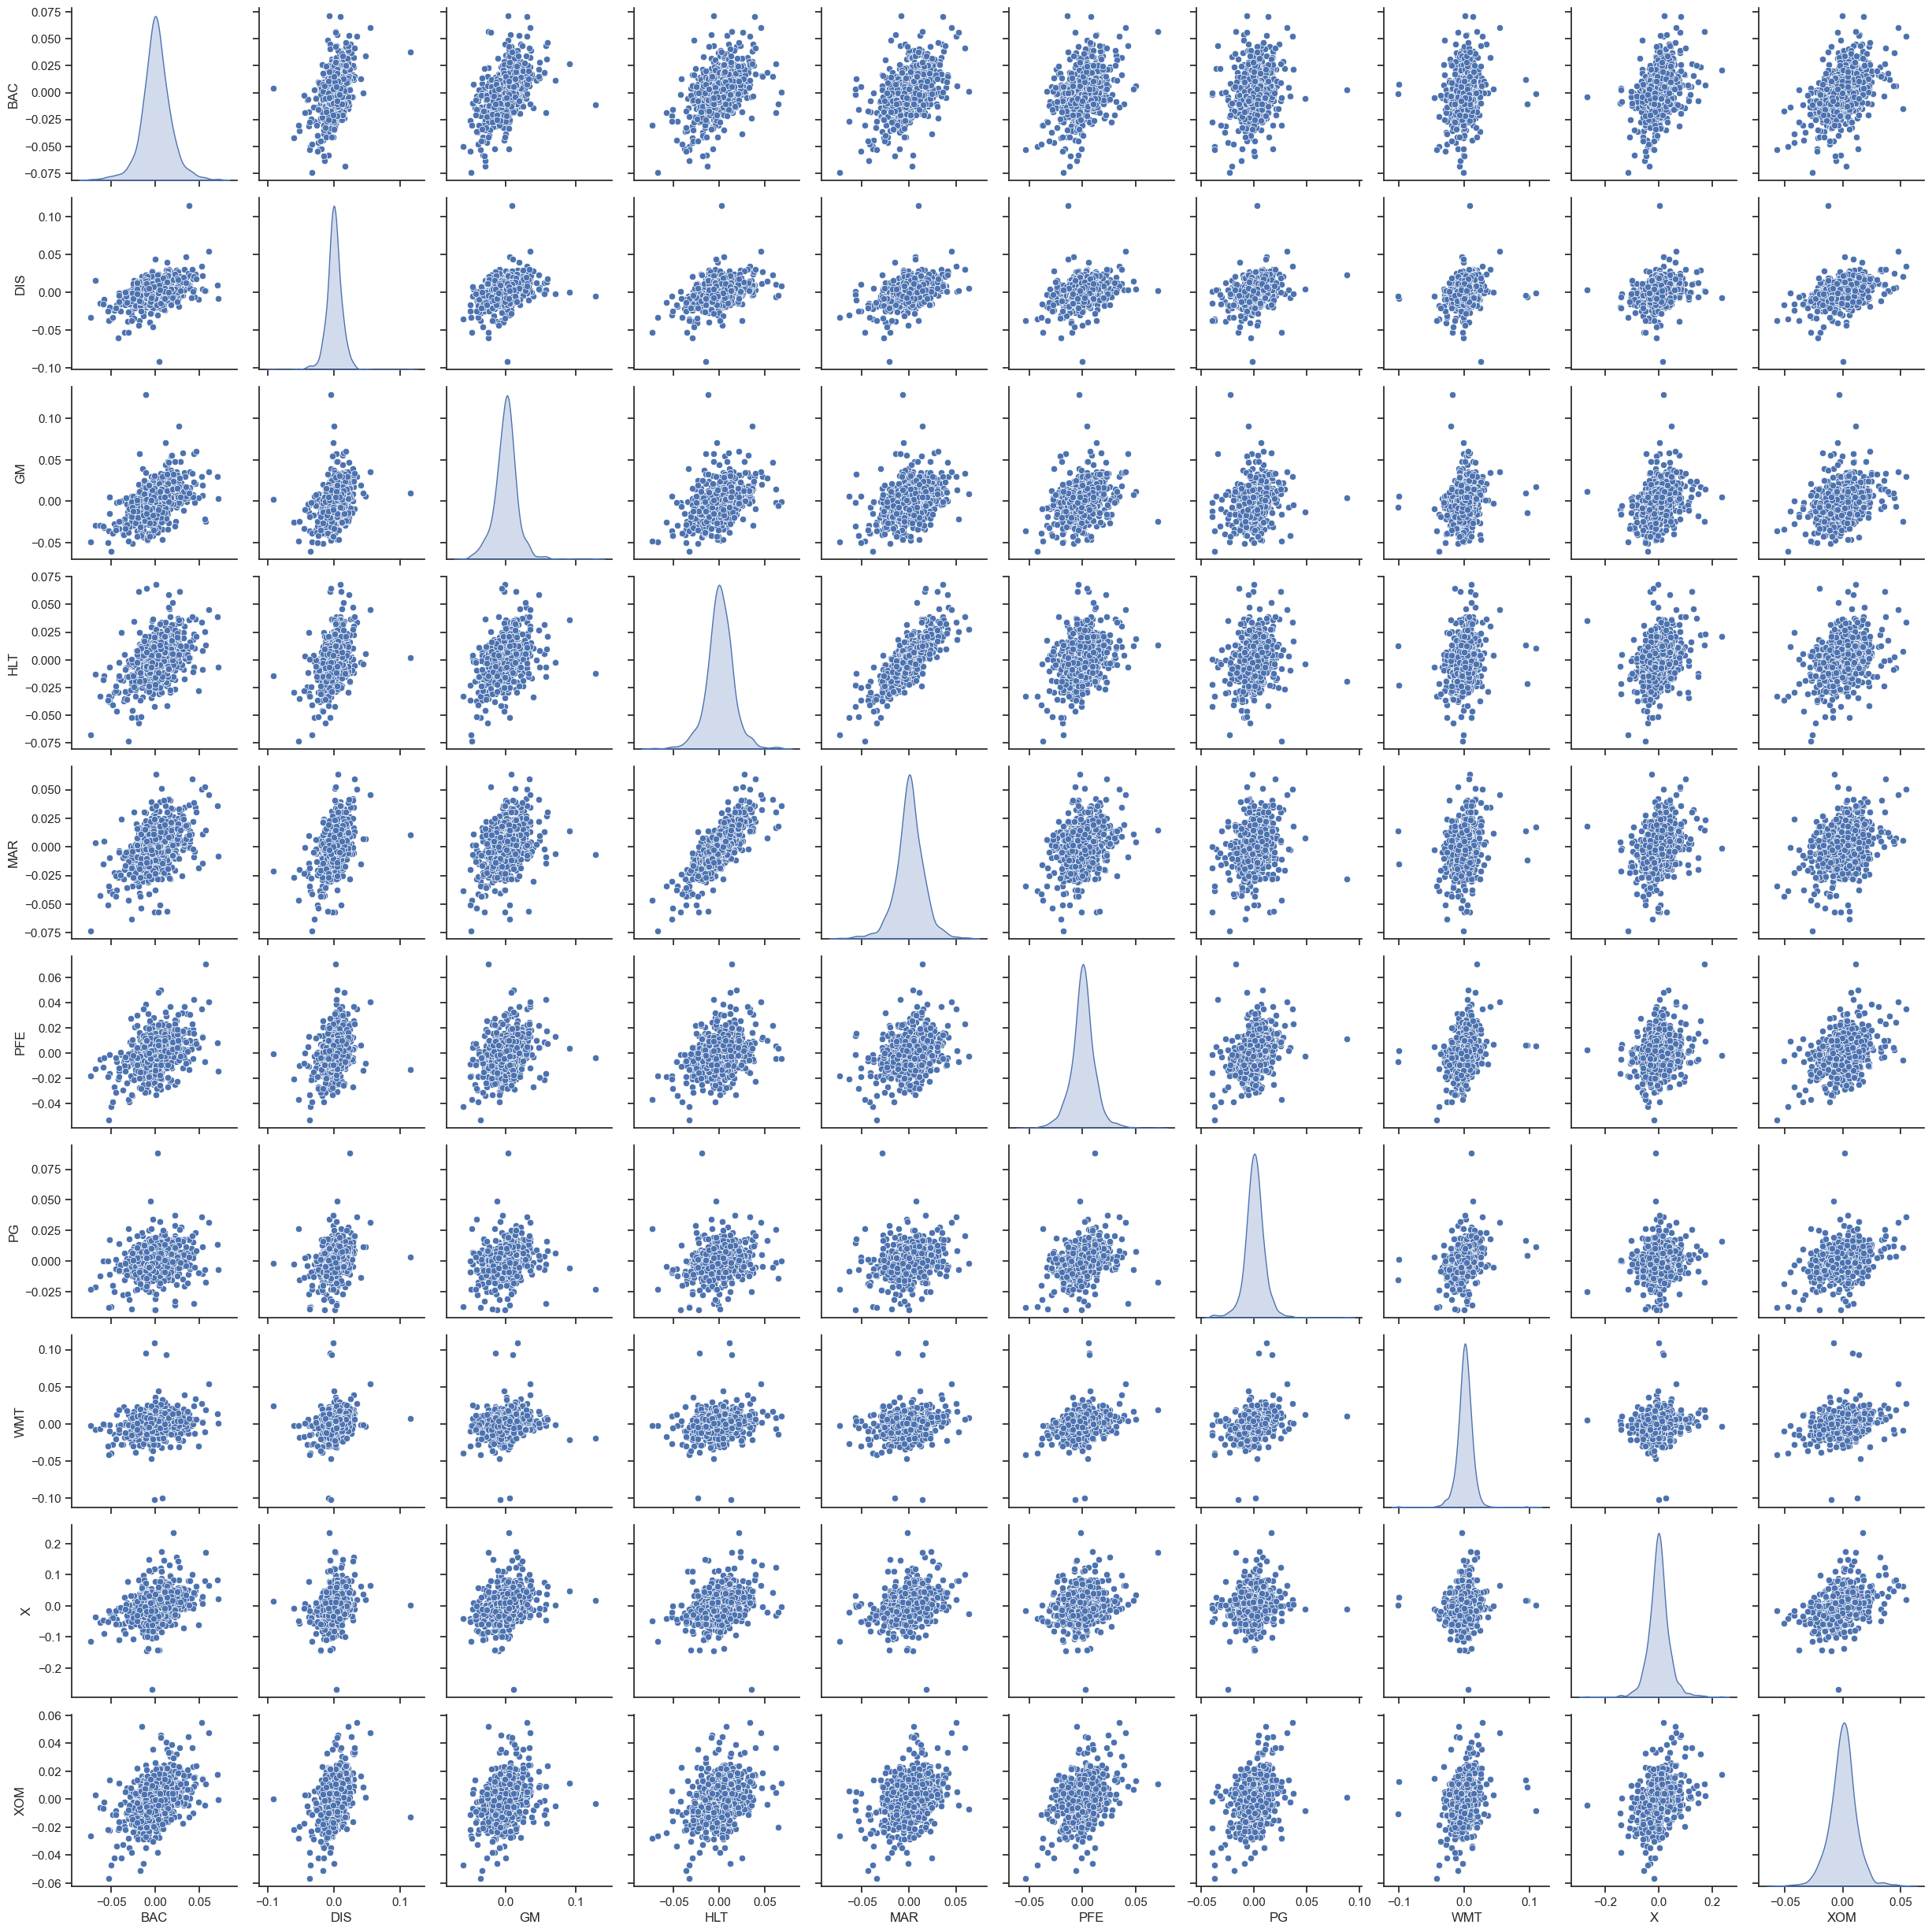

In [42]:
sns.set(style="ticks")
sns.pairplot(Daily_Linear_Return, diag_kind="kde")
plt.show()

### <font color = blue> 👉 Question 6. It is often useful to analyze stock performance against a market index such as the S&P 500. This will give a sense of how a stock price compares to movements in the overall market.

### Carry out the following analysis steps.

<font color = green>

> ### 1. Extract the S&P 500 (`^GSPC`) data for the same time period used for the stocks in Question 1.

> ### 2. In order to perform comparisons, you must run the same calculations to derive the daily percentage changes and cumulative returns on the index. You might first want to concatenate the index calculations in the results of the calculations of the stocks with respect to daily percentage changes. The process will lead you to efficiently compare the overall set of stocks and index calculations for daily percentage changes.

> ### 3. Calculate the cumulative daily returns.

> ### 4. To complete this analysis, calculate the correlation of the daily percentage change values.

> ### 5. Using location accessor, print only the correlational coefficients of each stock relative to the S&P 500, in descending order.

</font> 
        
### Which stock price moved in the most similar way to the S&P 500? Which moved in the least similar way?

### Below are the lines of code that lead to an answer:

In [43]:
spx = yf.download('^GSPC', start="2019-10-24", end="2023-10-25")
spx

[*********************100%%**********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-10-24  3014.780029  3016.070068  3000.419922  3010.290039  3010.290039   
2019-10-25  3003.320068  3027.389893  3001.939941  3022.550049  3022.550049   
2019-10-28  3032.120117  3044.080078  3032.120117  3039.419922  3039.419922   
2019-10-29  3035.389893  3047.870117  3034.810059  3036.889893  3036.889893   
2019-10-30  3039.739990  3050.100098  3025.959961  3046.770020  3046.770020   
...                 ...          ...          ...          ...          ...   
2023-10-18  4357.350098  4364.200195  4303.839844  4314.600098  4314.600098   
2023-10-19  4321.359863  4339.540039  4269.689941  4278.000000  4278.000000   
2023-10-20  4273.850098  4276.560059  4223.029785  4224.160156  4224.160156   
2023-10-23  4210.399902  4255.839844  4189.220215  4217.040039  4217.040039   
2023-10-24  4235.790039  4259.379883  4219.430176  4247.680176  4247.680176   

                Volume  
Date                    
2019-10-24  3696510000  
2019-10-25  3379060000  
2019-10-28  3524970000  
2019-10-29  3594430000  
2019-10-30  3779660000  
...                ...  
2023-10-18  3686030000  
2023-10-19  3969730000  
2023-10-20  4004030000  
2023-10-23  3776100000  
2023-10-24  3821820000  

[1007 rows x 6 columns]

In [44]:
spx.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [45]:
data_q6 = pd.concat([spx[['Adj Close']], data], axis = 1)
data_q6.rename(columns={'Adj Close': 'SP500'}, inplace=True)
data_q6

SP500        AAPL        ABNB        ADBE         ADI  \
Date                                                                      
2019-10-24  3010.290039   59.226208         NaN  269.700012   97.749535   
2019-10-25  3022.550049   59.955654         NaN  270.980011   99.150978   
2019-10-28  3039.419922   60.556225         NaN  271.350006  101.007217   
2019-10-29  3036.889893   59.155689         NaN  271.450012  100.283287   
2019-10-30  3046.770020   59.148399         NaN  278.410004  100.468895   
...                 ...         ...         ...         ...         ...   
2023-10-18  4314.600098  175.839996  122.169998  557.869995  171.270004   
2023-10-19  4278.000000  175.460007  119.970001  555.739990  168.720001   
2023-10-20  4224.160156  172.880005  116.489998  540.960022  166.520004   
2023-10-23  4217.040039  173.000000  120.389999  540.409973  163.869995   
2023-10-24  4247.680176  173.440002  122.010002  539.559998  164.929993   

                   ADP        ADSK        AEP        ALGN        AMAT  ...  \
Date                                                                   ...   
2019-10-24  149.505402  145.369995  83.430397  249.470001   52.897724  ...   
2019-10-25  148.971909  145.539993  82.236290  243.380005   53.522087  ...   
2019-10-28  149.450211  146.990005  81.382133  250.419998   54.703552  ...   
2019-10-29  149.772156  145.589996  81.207809  256.119995   53.329967  ...   
2019-10-30  150.986313  148.779999  82.018379  252.710007   53.032188  ...   
...                ...         ...        ...         ...         ...  ...   
2023-10-18  248.259995  209.639999  75.169998  272.399994  141.449997  ...   
2023-10-19  246.080002  206.070007  74.419998  270.290009  134.429993  ...   
2023-10-20  241.679993  202.690002  73.349998  269.880005  134.119995  ...   
2023-10-23  241.160004  199.720001  73.349998  265.720001  134.229996  ...   
2023-10-24  240.449997  205.039993  74.739998  265.459991  134.899994  ...   

                  TTD         TXN        VRSK        VRTX        WBA  \
Date                                                                   
2019-10-24  19.697001  105.173393  145.925064  194.470001  45.506775   
2019-10-25  20.261999  107.038651  145.116272  194.490005  46.317455   
2019-10-28  20.997000  106.585663  144.755707  194.020004  46.635036   
2019-10-29  20.731001  106.843239  146.285599  197.889999  47.027847   
2019-10-30  20.966000  105.411392  144.141815  199.279999  46.685188   
...               ...         ...         ...         ...        ...   
2023-10-18  76.769997  150.440979  238.130005  367.549988  21.250000   
2023-10-19  75.870003  149.568970  234.449997  364.799988  20.959999   
2023-10-20  74.059998  146.467392  234.449997  361.859985  21.260000   
2023-10-23  73.639999  144.990936  230.869995  367.660004  21.959999   
2023-10-24  76.519997  145.585480  230.139999  369.380005  21.370001   

                  WBD        WDAY        XEL         ZM          ZS  
Date                                                                 
2019-10-24  27.540001  158.589996  57.651665  64.519997   43.330002  
2019-10-25  27.570000  160.750000  56.847713  63.450001   42.860001  
2019-10-28  27.790001  159.399994  55.775784  66.559998   42.410000  
2019-10-29  27.420000  158.110001  55.900848  65.489998   43.119999  
2019-10-30  26.910000  164.100006  56.561863  70.000000   45.160000  
...               ...         ...        ...        ...         ...  
2023-10-18  10.580000  214.610001  59.330002  62.970001  170.399994  
2023-10-19  10.390000  213.259995  59.049999  62.360001  169.070007  
2023-10-20  10.330000  211.160004  58.099998  61.709999  162.190002  
2023-10-23  10.140000  209.580002  58.049999  61.130001  162.479996  
2023-10-24  10.080000  212.369995  59.080002  62.139999  164.789993  

[1007 rows x 99 columns]

In [46]:
Daily_Linear_Return_q6 =\
    (
        data_q6
        .pct_change(1)
    )

In [47]:
Q6_Corr = Daily_Linear_Return_q6.corr()

### <font color = red> Answer 6 is presented in the cell below: </font>

In [48]:
Ans6 = Q6_Corr[['SP500']].sort_values(by = 'SP500', ascending = False).iloc[1:]
Ans6

SP500
MSFT  0.834323
AAPL  0.814780
TXN   0.807466
PAYX  0.805005
INTU  0.794511
...        ...
SGEN  0.369667
LCID  0.336250
PDD   0.291008
ZM    0.213192
MRNA  0.155980

[98 rows x 1 columns]

In [49]:
print(f"stock that moves most similar way to the S&P 500 is {Ans6.index[0]}")
print(f"stock that moves least similar way to the S&P 500 is {Ans6.index[-1]}")

stock that moves most similar way to the S&P 500 is MSFT
stock that moves least similar way to the S&P 500 is MRNA


### <font color = blue> 👉 Question 7. One common type of data visualization in finance is a stock’s trading volume relative to its closing price.

### Create a chart below after obtaining the data from Yahoo Finance!, using `pandas.datareader`. The target symbol is `AMZN`, and our period of interest is between January 2007 and December 2009. 

In [50]:
# Specify the start and end dates
start_date = datetime.datetime(2007, 1, 1)
end_date = datetime.datetime(2010, 1, 1)
amz = pdr.get_data_yahoo('AMZN', '2007-01-01', '2010-01-01')
amz

[*********************100%%**********************]  1 of 1 completed


Open    High     Low   Close  Adj Close     Volume
Date                                                            
2007-01-03  1.9340  1.9530  1.9025  1.9350     1.9350  248102000
2007-01-04  1.9295  1.9570  1.9130  1.9450     1.9450  126368000
2007-01-05  1.9360  1.9395  1.8800  1.9185     1.9185  132394000
2007-01-08  1.9110  1.9155  1.8585  1.8750     1.8750  135660000
2007-01-09  1.8800  1.9030  1.8670  1.8890     1.8890  114060000
...            ...     ...     ...     ...        ...        ...
2009-12-24  6.9600  6.9850  6.8770  6.9235     6.9235  102576000
2009-12-28  6.9875  7.0990  6.9265  6.9655     6.9655  175278000
2009-12-29  7.0645  7.1290  6.9275  6.9705     6.9705  168012000
2009-12-30  6.9200  6.9200  6.7640  6.8245     6.8245  138264000
2009-12-31  6.8545  6.8640  6.7260  6.7260     6.7260   90460000

[756 rows x 6 columns]

### Below are the lines of code that lead to an answer:

In [51]:
# Select the 'Volume' column from the DataFrame
volumes = amz['Volume']
# Select the 'Close' column from the DataFrame
close_prices = amz['Close']
# Define the x-axis values (dates)
dates = amz.index

### <font color = red> Answer 7 is presented in the cell below: </font>

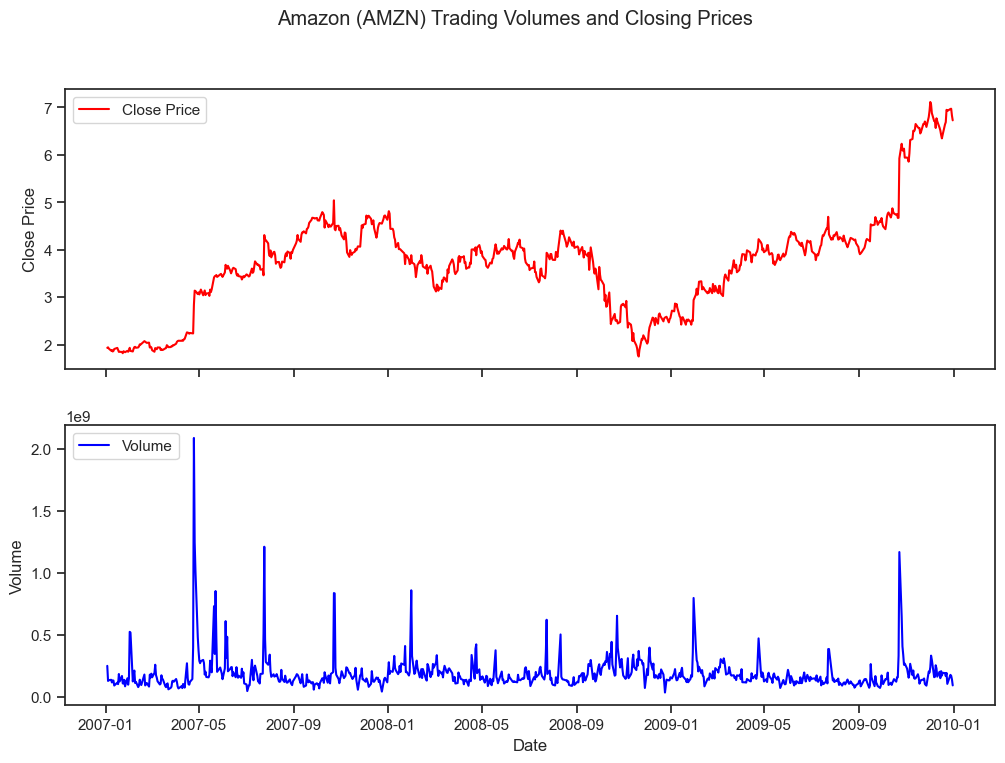

In [52]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot the closing prices on the upper subplot
ax1.plot(dates, close_prices, color='red', label='Close Price')
ax1.set_ylabel('Close Price')

# Plot trading volumes as a bar chart on the lower subplot
ax2.plot(dates, volumes, color='blue', label='Volume')
ax2.set_xlabel('Date')
ax2.set_ylabel('Volume')

# Customize the chart (optional)
plt.suptitle('Amazon (AMZN) Trading Volumes and Closing Prices')

# Add legends for both data series
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

# Show the chart
plt.show()

In [94]:
def vis_Volume_vs_Price(data):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.plot(data.index, data['Close'], label='Close Price', color='blue')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Close Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.bar(data.index, data['Volume'], label='Trading Volume', color='gray', alpha=0.5)
    ax2.set_ylabel('Trading Volume', color='gray')

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='upper left')

    plt.xticks(rotation=45)
    plt.title('Stock Trading Volume vs. Close Price')
    plt.show()
    return

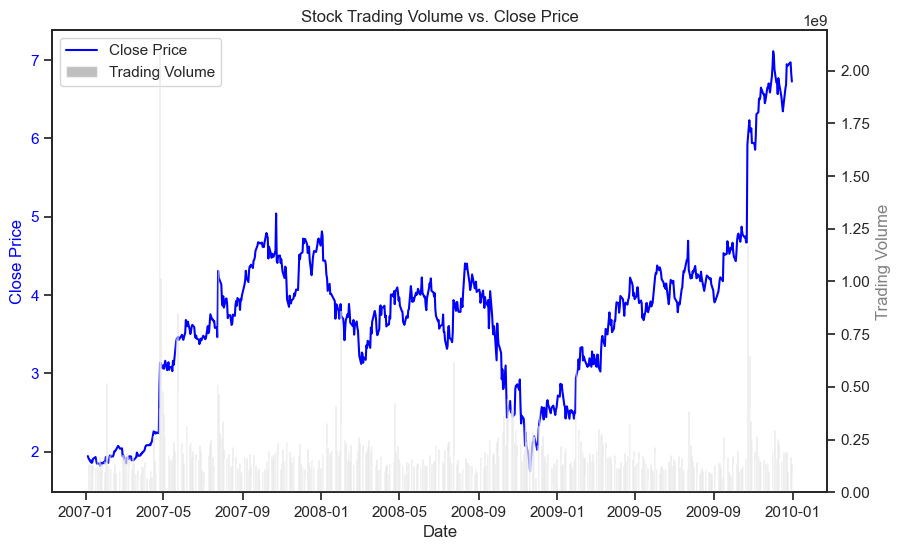

In [95]:
vis_Volume_vs_Price(amz)

In [53]:
amz['Daily_Return'] = amz['Adj Close'].pct_change(1)
amz.dropna(inplace = True)

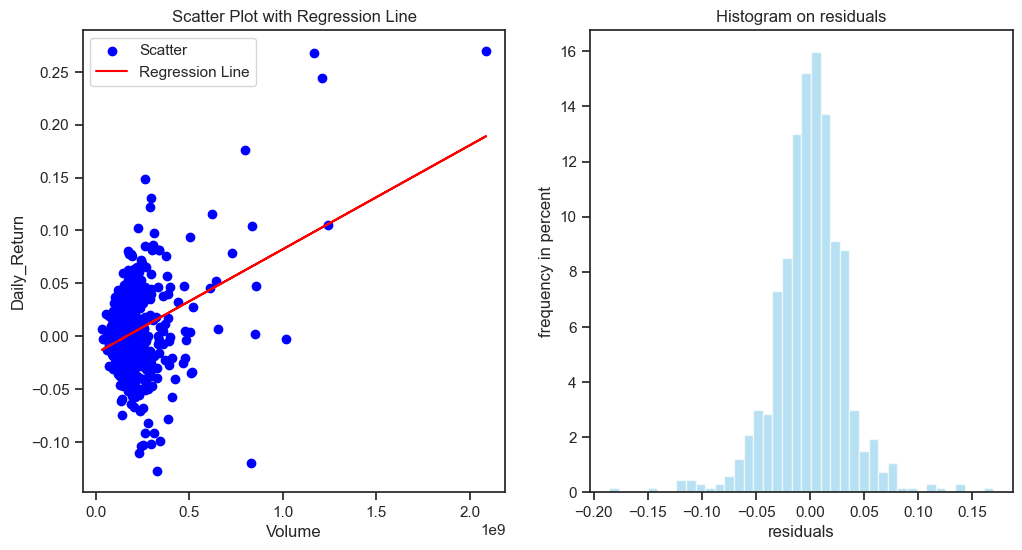

In [54]:
ans7 = daily_pct_ols(amz[['Volume', 'Daily_Return']])

## 👇 <font color = "purple"> Bigger Question 8. 

### Please create a predictive model for the weekly return of NFLX stock. You will use supervised learning for your predictive modelling.

> As you learned in class, to do this it is essential to know what factors are related to Netflix’s stock price, and to incorporate as much information as you can into the model.

> Among the three major factors (correlated assets, technical indicators, and fundamental analysis), you will use correlated assets and technical indicators as features here.

    Step 1. Use 75% of your data for the training of your algorithm, and 25% for the testing set.

    Step 2. For your feature engineering...
    
> Our operational definition of `outcome` (`Y`) is the weekly return of Netflix (NFLX). The number of trading days in a week is assumed to be five, and we compute the return using five trading days. 
<br>
    
* <font color = "green"> NOTE: The lagged five-day variables embed the time series component by using a time-delay approach, where the lagged variable is included as one of the predictor variables. This step translates the time series data into a supervised regression-based model framework.
<br>    
    
> For `input features` (`predictors`; `Xs`), we use (The variables used as predictors are as follows) ...

> `Correlated assets`

* lagged five-day returns of stocks (META, APPLE, AMZN, GOOGL);
* currency exchange rates (USD/JPY and GBP/USD);
* indices (S&P 500, Dow Jones, and VIX);
* lagged five-day, 15-day, 30-day, and 60-day returns of NFLX.

> `Technical indicators`

* 21-day, 63-day, and 252-day moving averages;
* 10-day, 30-day, and 200-day exponential moving averages;
* 10-day, 30-day, and 200-day relative strength index;
* stochastic oscillator %K and %D (using rolling windows of 10-, 30-, 200-day);
* rate of change (using 10-, 30-day past prices).
    
    
    Step 3. For your algorithm of choices, please assess the model performance of the following algorithms: 

    
* Linear Regression
* Elastic Net
* LASSO
* Support Vector Machine
* K-Nearest Neighbor
* ARIMA
* Decision Tree
* Extra Trees 
* Random Forest
* Gradient Boosting Tree
* Adaptive Boosting
    
    
    Step 4. For this exercise, hyperparameter tuning is not requested. 
    
    Step 5. But make sure to compare the model performance of the above algorithms.

> The metric for assessing model performance will be mean squared error (`MSE`).
<br>

> Show which of the algorithms perform relatively better by a comparison visualization of performance, for both the training and testing sets learned in class. 

    Step 6. Using the model of your choice, please visualize the actual vs. predicted (estimated) data.

### Below are the lines of code that lead to an answer:

In [55]:
stock_ticker = ['NFLX', 'META', "AAPL", "AMZN", "GOOGL"]

currency_ticker = ["DEXJPUS", "DEXUSUK"]

index_ticker = ["SP500", "DJIA", "VIXCLS"]

stock_data = yf.download(stock_ticker)
currency_data = pdr.get_data_fred(currency_ticker)
index_data = pdr.get_data_fred(index_ticker)

[*********************100%%**********************]  5 of 5 completed


In [56]:
validation_size = 0.25 
stock_data

Adj Close                                                  \
                  AAPL        AMZN       GOOGL        META        NFLX   
Date                                                                     
1980-12-12    0.099450         NaN         NaN         NaN         NaN   
1980-12-15    0.094261         NaN         NaN         NaN         NaN   
1980-12-16    0.087343         NaN         NaN         NaN         NaN   
1980-12-17    0.089504         NaN         NaN         NaN         NaN   
1980-12-18    0.092099         NaN         NaN         NaN         NaN   
...                ...         ...         ...         ...         ...   
2023-10-30  170.289993  132.710007  124.459999  302.660004  410.079987   
2023-10-31  170.770004  133.089996  124.080002  301.269989  411.690002   
2023-11-01  173.970001  137.000000  126.449997  311.850006  420.190002   
2023-11-02  177.570007  138.070007  127.489998  310.869995  424.709991   
2023-11-03  176.649994  138.600006  129.100006  314.600006  432.359985   

                 Close                                                  ...  \
                  AAPL        AMZN       GOOGL        META        NFLX  ...   
Date                                                                    ...   
1980-12-12    0.128348         NaN         NaN         NaN         NaN  ...   
1980-12-15    0.121652         NaN         NaN         NaN         NaN  ...   
1980-12-16    0.112723         NaN         NaN         NaN         NaN  ...   
1980-12-17    0.115513         NaN         NaN         NaN         NaN  ...   
1980-12-18    0.118862         NaN         NaN         NaN         NaN  ...   
...                ...         ...         ...         ...         ...  ...   
2023-10-30  170.289993  132.710007  124.459999  302.660004  410.079987  ...   
2023-10-31  170.770004  133.089996  124.080002  301.269989  411.690002  ...   
2023-11-01  173.970001  137.000000  126.449997  311.850006  420.190002  ...   
2023-11-02  177.570007  138.070007  127.489998  310.869995  424.709991  ...   
2023-11-03  176.649994  138.600006  129.100006  314.600006  432.359985  ...   

                  Open                                                  \
                  AAPL        AMZN       GOOGL        META        NFLX   
Date                                                                     
1980-12-12    0.128348         NaN         NaN         NaN         NaN   
1980-12-15    0.122210         NaN         NaN         NaN         NaN   
1980-12-16    0.113281         NaN         NaN         NaN         NaN   
1980-12-17    0.115513         NaN         NaN         NaN         NaN   
1980-12-18    0.118862         NaN         NaN         NaN         NaN   
...                ...         ...         ...         ...         ...   
2023-10-30  169.020004  129.720001  123.209999  299.089996  402.350006   
2023-10-31  169.350006  132.750000  125.059998  303.309998  409.239990   
2023-11-01  171.000000  133.960007  124.070000  301.850006  414.769989   
2023-11-02  175.520004  138.729996  128.419998  317.299988  421.170013   
2023-11-03  174.240005  138.990005  128.020004  312.549988  428.760010   

               Volume                                                 
                 AAPL        AMZN       GOOGL        META       NFLX  
Date                                                                  
1980-12-12  469033600         NaN         NaN         NaN        NaN  
1980-12-15  175884800         NaN         NaN         NaN        NaN  
1980-12-16  105728000         NaN         NaN         NaN        NaN  
1980-12-17   86441600         NaN         NaN         NaN        NaN  
1980-12-18   73449600         NaN         NaN         NaN        NaN  
...               ...         ...         ...         ...        ...  
2023-10-30   51131000  72485500.0  28940100.0  28435100.0  5317100.0  
2023-10-31   44846000  51589400.0  26292300.0  19434200.0  3877600.0  
2023-11-01   56934900  61529400.0  30082400.0  2043

In [57]:
return_period = 5
Y =\
    (np
     .log(stock_data.loc[ : , ("Adj Close", "NFLX")]
         )
     .diff(return_period)
     .shift(-return_period)
    )
Y

Date
1980-12-12   NaN
1980-12-15   NaN
1980-12-16   NaN
1980-12-17   NaN
1980-12-18   NaN
              ..
2023-10-30   NaN
2023-10-31   NaN
2023-11-01   NaN
2023-11-02   NaN
2023-11-03   NaN
Name: (Adj Close, NFLX), Length: 10815, dtype: float64

In [58]:
Y.name =\
    (Y
     .name[-1]
     +
     "_pred")
Y

Date
1980-12-12   NaN
1980-12-15   NaN
1980-12-16   NaN
1980-12-17   NaN
1980-12-18   NaN
              ..
2023-10-30   NaN
2023-10-31   NaN
2023-11-01   NaN
2023-11-02   NaN
2023-11-03   NaN
Name: NFLX_pred, Length: 10815, dtype: float64

In [59]:
X1 =\
    (np.
     log(stock_data.loc[ : , ("Adj Close", ('META', "AAPL", "AMZN", "GOOGL")
                             )
                       ]
        )
     .diff(return_period)
    )

X1.columns =\
    (X1
     .columns
     .droplevel()
    )

X1

META      AAPL      AMZN     GOOGL
Date                                              
1980-12-12       NaN       NaN       NaN       NaN
1980-12-15       NaN       NaN       NaN       NaN
1980-12-16       NaN       NaN       NaN       NaN
1980-12-17       NaN       NaN       NaN       NaN
1980-12-18       NaN       NaN       NaN       NaN
...              ...       ...       ...       ...
2023-10-30 -0.036815 -0.015789  0.047450 -0.092340
2023-10-31 -0.036758 -0.015514  0.034630 -0.112180
2023-11-01  0.040308  0.016635  0.120972  0.006665
2023-11-02  0.075200  0.062030  0.143859  0.041724
2023-11-03  0.058479  0.048898  0.081595  0.055174

[10815 rows x 4 columns]

In [60]:
X2 =\
    (np
     .log(currency_data)
     .diff(return_period)
    )

X2

DEXJPUS   DEXUSUK
DATE                          
2018-11-06       NaN       NaN
2018-11-07       NaN       NaN
2018-11-08       NaN       NaN
2018-11-09       NaN       NaN
2018-11-12       NaN       NaN
...              ...       ...
2023-10-23  0.001403  0.003029
2023-10-24  0.000868 -0.002954
2023-10-25  0.000534 -0.000823
2023-10-26  0.003463 -0.002638
2023-10-27 -0.001670 -0.000165

[1299 rows x 2 columns]

In [61]:
X3 =\
    (np
     .log(index_data)
     .diff(return_period)
    )

X3

SP500      DJIA    VIXCLS
DATE                                    
2018-11-06       NaN       NaN       NaN
2018-11-07       NaN       NaN       NaN
2018-11-08       NaN       NaN       NaN
2018-11-09       NaN       NaN       NaN
2018-11-12       NaN       NaN       NaN
...              ...       ...       ...
2023-10-30 -0.011980 -0.000226 -0.030910
2023-10-31 -0.012766 -0.002674 -0.044739
2023-11-01  0.012129  0.007198 -0.179651
2023-11-02  0.042715  0.031667 -0.278057
2023-11-03  0.056877  0.049461       NaN

[1304 rows x 3 columns]

In [62]:
X4 =\
    (
    pd
    .concat([np
             .log(stock_data.loc[ : , ("Adj Close", "NFLX")
                                ]
                 )
             .diff(i) for i in [return_period, 
                                return_period * 3, 
                                return_period * 6, 
                                return_period * 12]
            ],
           axis = 1
           )
    .dropna()
)

X4.columns = ["NFLX_DT", "NFLX_3DT", "NFLX_6DT", "NFLX_12DT"]
X4

NFLX_DT  NFLX_3DT  NFLX_6DT  NFLX_12DT
Date                                               
2002-08-19  0.260185  0.113881 -0.179894  -0.197360
2002-08-20  0.202602  0.034553 -0.204095  -0.245680
2002-08-21  0.150103  0.015608 -0.183427  -0.177888
2002-08-22  0.108027  0.098364 -0.255020  -0.115117
2002-08-23  0.084726  0.244763 -0.195297  -0.075443
...              ...       ...       ...        ...
2023-10-30  0.007932  0.060644  0.038987  -0.051147
2023-10-31 -0.004943  0.097835  0.038351  -0.068230
2023-11-01  0.021506  0.138265  0.084093  -0.042197
2023-11-02  0.051131  0.161975  0.100373  -0.009817
2023-11-03  0.083133  0.195227  0.129587   0.005520

[5341 rows x 4 columns]

In [63]:
X=\
(
    pd
    .concat([X1, X2, X3, X4],
            axis = 1)
)

X

META      AAPL      AMZN     GOOGL  DEXJPUS  DEXUSUK  \
1980-12-12       NaN       NaN       NaN       NaN      NaN      NaN   
1980-12-15       NaN       NaN       NaN       NaN      NaN      NaN   
1980-12-16       NaN       NaN       NaN       NaN      NaN      NaN   
1980-12-17       NaN       NaN       NaN       NaN      NaN      NaN   
1980-12-18       NaN       NaN       NaN       NaN      NaN      NaN   
...              ...       ...       ...       ...      ...      ...   
2023-10-30 -0.036815 -0.015789  0.047450 -0.092340      NaN      NaN   
2023-10-31 -0.036758 -0.015514  0.034630 -0.112180      NaN      NaN   
2023-11-01  0.040308  0.016635  0.120972  0.006665      NaN      NaN   
2023-11-02  0.075200  0.062030  0.143859  0.041724      NaN      NaN   
2023-11-03  0.058479  0.048898  0.081595  0.055174      NaN      NaN   

               SP500      DJIA    VIXCLS   NFLX_DT  NFLX_3DT  NFLX_6DT  \
1980-12-12       NaN       NaN       NaN       NaN       NaN       NaN   
1980-12-15       NaN       NaN       NaN       NaN       NaN       NaN   
1980-12-16       NaN       NaN       NaN       NaN       NaN       NaN   
1980-12-17       NaN       NaN       NaN       NaN       NaN       NaN   
1980-12-18       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2023-10-30 -0.011980 -0.000226 -0.030910  0.007932  0.060644  0.038987   
2023-10-31 -0.012766 -0.002674 -0.044739 -0.004943  0.097835  0.038351   
2023-11-01  0.012129  0.007198 -0.179651  0.021506  0.138265  0.084093   
2023-11-02  0.042715  0.031667 -0.278057  0.051131  0.161975  0.100373   
2023-11-03  0.056877  0.049461       NaN  0.083133  0.195227  0.129587   

            NFLX_12DT  
1980-12-12        NaN  
1980-12-15        NaN  
1980-12-16        NaN  
1980-12-17        NaN  
1980-12-18        NaN  
...               ...  
2023-10-30  -0.051147  
2023-10-31  -0.068230  
2023-11-01  -0.042197  
2023-11-02  -0.009817  
2023-11-03   0.005520  

[10862 rows x 13 columns]

In [64]:
T1 =\
    (
    pd
    .concat([stock_data.loc[ : , ("Adj Close", "NFLX")]
             .rolling(window=i)
             .mean() for i in [21, 
                                63, 
                                252]
            ],
           axis = 1
           )

)

T1.columns = ["NFLX_MA21", "NFLX_MA63", "NFLX_MA252"]
T1

NFLX_MA21   NFLX_MA63  NFLX_MA252
Date                                          
1980-12-12         NaN         NaN         NaN
1980-12-15         NaN         NaN         NaN
1980-12-16         NaN         NaN         NaN
1980-12-17         NaN         NaN         NaN
1980-12-18         NaN         NaN         NaN
...                ...         ...         ...
2023-10-30  382.806190  404.763492  361.016468
2023-10-31  384.299524  404.477619  361.476667
2023-11-01  386.368096  404.306031  361.985833
2023-11-02  388.644762  404.196666  362.533294
2023-11-03  391.490952  404.063332  363.165675

[10815 rows x 3 columns]

In [65]:
T2 =\
    (
    pd
    .concat([stock_data.loc[ : , ("Adj Close", "NFLX")]
             .ewm(span=i, adjust=False)
             .mean() for i in [10, 
                                30, 
                                200]
            ],
           axis = 1
           )

)

T2.columns = ["NFLX_EMA10", "NFLX_EMA30", "NFLX_EMA200"]
T2

NFLX_EMA10  NFLX_EMA30  NFLX_EMA200
Date                                           
1980-12-12         NaN         NaN          NaN
1980-12-15         NaN         NaN          NaN
1980-12-16         NaN         NaN          NaN
1980-12-17         NaN         NaN          NaN
1980-12-18         NaN         NaN          NaN
...                ...         ...          ...
2023-10-30  397.356414  392.099606   378.809144
2023-10-31  399.962521  393.363502   379.136317
2023-11-01  403.640245  395.094244   379.544811
2023-11-02  407.471108  397.004938   379.994216
2023-11-03  411.996358  399.285908   380.515268

[10815 rows x 3 columns]

In [66]:
def sig_RSI(stock, period, low_line=50):
    outcome = stock.copy()
    outcome.dropna(inplace = True)    
    outcome.columns = ['Close']

    outcome['Return'] = outcome['Close'].pct_change()
    outcome['Gain'] = np.where(outcome['Return'] < 0, 0, outcome['Return'])
    outcome['AG'] = outcome['Gain'].rolling(window=period).mean()        
    outcome['Loss'] = np.where(outcome['Return'] > 0, 0, outcome['Return'])
    outcome['AL'] = outcome['Loss'].rolling(window=period).mean()  
    outcome['RSI'] = 100 * (1 - 1 / (1+outcome['AG']/(-outcome['AL'])))
    outcome['Lower'] = low_line
    outcome['Higher'] = 100 - low_line
       
    outcome["position"] = np.nan
    flag = 0
    # it takes at least period of days to get correct signal
    # before that all position shall be set to 0    
    for idx in outcome.index[period:]:
        rsi = outcome.loc[idx, 'RSI']
        # rsi from 30 - 70
        if abs(rsi - 50) <= 50 - low_line:
            # flag is to rememeber if in a trading position
            if flag == 0:
                continue
            else:
                # we are in a trade right now
                if flag * (rsi - 50) > 0:
                # clear flag, ready for next trade signal
                    flag = 0
        # if rsi identified an strong momentum, trade on reversion.
        else:
            # rsi above 70
            if rsi > 100 - low_line:
                flag = -1
            
            # rsi below 30
            else:
                flag = 1
        outcome.loc[idx, 'position'] = flag  
   
    # as RSI only available after market closes with a 'Close' Price
    # Thus position only opened on next market day
    outcome["position"] = outcome["position"].shift(1)
    outcome["position"].fillna(0, inplace=True)        
    
    outcome["B_S"] = outcome["position"].diff()
    outcome["B_S"].fillna(0, inplace=True)
    return outcome

In [67]:
nflx = pd.DataFrame({'close': 
                         stock_data.loc[ : , ("Adj Close", "NFLX")]},
                    index = stock_data.index)
nflx

close
Date                  
1980-12-12         NaN
1980-12-15         NaN
1980-12-16         NaN
1980-12-17         NaN
1980-12-18         NaN
...                ...
2023-10-30  410.079987
2023-10-31  411.690002
2023-11-01  420.190002
2023-11-02  424.709991
2023-11-03  432.359985

[10815 rows x 1 columns]

In [68]:
sig_RSI(nflx, 10, low_line=50)[['RSI']]

RSI
Date                 
2002-05-23        NaN
2002-05-24        NaN
2002-05-28        NaN
2002-05-29        NaN
2002-05-30        NaN
...               ...
2023-10-30  73.164171
2023-10-31  77.035251
2023-11-01  85.841006
2023-11-02  70.519695
2023-11-03  74.879013

[5401 rows x 1 columns]

In [69]:
T3 = (
    pd.concat(
        [sig_RSI(nflx, i, low_line=50)[['RSI']] for i in [10, 30, 200]],
        axis=1
    )
)

T3.columns = ["RSI10", "RSI30", "RSI200"]
T3

RSI10      RSI30     RSI200
Date                                       
2002-05-23        NaN        NaN        NaN
2002-05-24        NaN        NaN        NaN
2002-05-28        NaN        NaN        NaN
2002-05-29        NaN        NaN        NaN
2002-05-30        NaN        NaN        NaN
...               ...        ...        ...
2023-10-30  73.164171  54.945430  54.024015
2023-10-31  77.035251  54.892996  53.967940
2023-11-01  85.841006  59.128440  54.551488
2023-11-02  70.519695  60.528896  54.687843
2023-11-03  74.879013  63.039167  55.434989

[5401 rows x 3 columns]

In [70]:
def KDJ(df, d_period, k_period = 14):
    data = df.copy()
    # Define the rolling window periods

    # Calculate %K
    data['Lowest_Low'] = data['Low'].rolling(window=k_period).min()
    data['Highest_High'] = data['High'].rolling(window=k_period).max()
    data['%K'] =\
        100 * ((data['Close'] - data['Lowest_Low']) /\
               (data['Highest_High'] - data['Lowest_Low']))

    # Calculate %D
    data['%D'] = data['%K'].rolling(window=d_period).mean()
    
    return data

In [71]:
nflx_kdj = yf.download('NFLX')
nflx_kdj

[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2002-05-23    1.156429    1.242857    1.145714    1.196429    1.196429   
2002-05-24    1.214286    1.225000    1.197143    1.210000    1.210000   
2002-05-28    1.213571    1.232143    1.157143    1.157143    1.157143   
2002-05-29    1.164286    1.164286    1.085714    1.103571    1.103571   
2002-05-30    1.107857    1.107857    1.071429    1.071429    1.071429   
...                ...         ...         ...         ...         ...   
2023-10-30  402.350006  412.820007  399.410004  410.079987  410.079987   
2023-10-31  409.239990  412.519989  404.630005  411.690002  411.690002   
2023-11-01  414.769989  420.600006  414.179993  420.190002  420.190002   
2023-11-02  421.170013  426.690002  417.100006  424.709991  424.709991   
2023-11-03  428.760010  434.820007  425.529999  432.359985  432.359985   

               Volume  
Date                   
2002-05-23  104790000  
2002-05-24   11104800  
2002-05-28    6609400  
2002-05-29    6757800  
2002-05-30   10154200  
...               ...  
2023-10-30    5317100  
2023-10-31    3877600  
2023-11-01    4806100  
2023-11-02    4476000  
2023-11-03    3664800  

[5401 rows x 6 columns]

In [72]:
T4 = (
    pd.concat(
        [KDJ(nflx_kdj, i)[['%D']] for i in [10, 30, 200]],
        axis=1
    )
)

T4.columns = ["KDR10", "KDR30", "KDR200"]
T4

KDR10      KDR30     KDR200
Date                                       
2002-05-23        NaN        NaN        NaN
2002-05-24        NaN        NaN        NaN
2002-05-28        NaN        NaN        NaN
2002-05-29        NaN        NaN        NaN
2002-05-30        NaN        NaN        NaN
...               ...        ...        ...
2023-10-30  70.472638  32.422760  52.066490
2023-10-31  78.651377  35.120681  52.048532
2023-11-01  88.306328  38.427090  52.128294
2023-11-02  89.182781  41.645149  52.197808
2023-11-03  90.378391  44.823094  52.371700

[5401 rows x 3 columns]

In [73]:
nflx_kdj['ROC_10'] = (nflx_kdj['Close'] / nflx_kdj['Close'].shift(10) - 1) * 100
nflx_kdj['ROC_30'] = (nflx_kdj['Close'] / nflx_kdj['Close'].shift(30) - 1) * 100
# Calculate the ROC for 30 days
T5 = nflx_kdj[['ROC_10', 'ROC_30']]
T5

ROC_10     ROC_30
Date                            
2002-05-23        NaN        NaN
2002-05-24        NaN        NaN
2002-05-28        NaN        NaN
2002-05-29        NaN        NaN
2002-05-30        NaN        NaN
...               ...        ...
2023-10-30  13.652231   3.975657
2023-10-31  15.734286   3.909639
2023-11-01  21.375545   8.772978
2023-11-02   5.709735  10.558375
2023-11-03   7.831204  13.835862

[5401 rows x 2 columns]

In [74]:
T=\
(
    pd
    .concat([T1, T2, T3, T4, T5],
            axis = 1)
)

T

NFLX_MA21   NFLX_MA63  NFLX_MA252  NFLX_EMA10  NFLX_EMA30  \
Date                                                                     
1980-12-12         NaN         NaN         NaN         NaN         NaN   
1980-12-15         NaN         NaN         NaN         NaN         NaN   
1980-12-16         NaN         NaN         NaN         NaN         NaN   
1980-12-17         NaN         NaN         NaN         NaN         NaN   
1980-12-18         NaN         NaN         NaN         NaN         NaN   
...                ...         ...         ...         ...         ...   
2023-10-30  382.806190  404.763492  361.016468  397.356414  392.099606   
2023-10-31  384.299524  404.477619  361.476667  399.962521  393.363502   
2023-11-01  386.368096  404.306031  361.985833  403.640245  395.094244   
2023-11-02  388.644762  404.196666  362.533294  407.471108  397.004938   
2023-11-03  391.490952  404.063332  363.165675  411.996358  399.285908   

            NFLX_EMA200      RSI10      RSI30     RSI200      KDR10  \
Date                                                                  
1980-12-12          NaN        NaN        NaN        NaN        NaN   
1980-12-15          NaN        NaN        NaN        NaN        NaN   
1980-12-16          NaN        NaN        NaN        NaN        NaN   
1980-12-17          NaN        NaN        NaN        NaN        NaN   
1980-12-18          NaN        NaN        NaN        NaN        NaN   
...                 ...        ...        ...        ...        ...   
2023-10-30   378.809144  73.164171  54.945430  54.024015  70.472638   
2023-10-31   379.136317  77.035251  54.892996  53.967940  78.651377   
2023-11-01   379.544811  85.841006  59.128440  54.551488  88.306328   
2023-11-02   379.994216  70.519695  60.528896  54.687843  89.182781   
2023-11-03   380.515268  74.879013  63.039167  55.434989  90.378391   

                KDR30     KDR200     ROC_10     ROC_30  
Date                                                    
1980-12-12        NaN        NaN        NaN        NaN  
1980-12-15        NaN        NaN        NaN        NaN  
1980-12-16        NaN        NaN        NaN        NaN  
1980-12-17        NaN        NaN        NaN        NaN  
1980-12-18        NaN        NaN        NaN        NaN  
...               ...        ...        ...        ...  
2023-10-30  32.422760  52.066490  13.652231   3.975657  
2023-10-31  35.120681  52.048532  15.734286   3.909639  
2023-11-01  38.427090  52.128294  21.375545   8.772978  
2023-11-02  41.645149  52.197808   5.709735  10.558375  
2023-11-03  44.823094  52.371700   7.831204  13.835862  

[10815 rows x 14 columns]

In [75]:
data =\
(
pd
.concat([Y, X, T],
        axis = 1)
.dropna()
.iloc[ : :return_period, :]
)

data

NFLX_pred      META      AAPL      AMZN     GOOGL   DEXJPUS  \
2018-11-13  -0.097766 -0.053282 -0.054816 -0.007111 -0.020402  0.005190   
2018-11-21   0.096721 -0.067399 -0.055132 -0.052828 -0.010629 -0.005645   
2018-11-30  -0.059136  0.065236  0.035858  0.117992  0.074389  0.006273   
2018-12-10  -0.025917  0.008780 -0.051594 -0.029505 -0.052230 -0.005121   
2018-12-18  -0.065863  0.011059 -0.015298 -0.057461 -0.017330 -0.007701   
...               ...       ...       ...       ...       ...       ...   
2023-09-25  -0.011684 -0.005701 -0.010677 -0.064243 -0.052738  0.007491   
2023-10-02   0.014669  0.019716 -0.013321 -0.013884  0.023071  0.007101   
2023-10-10  -0.048292  0.067144  0.034155  0.037455  0.041634 -0.003627   
2023-10-18   0.172214 -0.033658 -0.022271 -0.028468 -0.018599  0.004615   
2023-10-25   0.021506 -0.056593 -0.027326 -0.054037 -0.093782  0.000534   

             DEXUSUK     SP500      DJIA    VIXCLS  ...  NFLX_EMA30  \
2018-11-13 -0.003447 -0.012148 -0.013689  0.005510  ...  322.113669   
2018-11-21 -0.018227 -0.019304 -0.024860 -0.021404  ...  306.892154   
2018-11-30 -0.002502  0.047336  0.050288 -0.174730  ...  296.494182   
2018-12-10 -0.014546 -0.056259 -0.055862  0.320001  ...  290.680634   
2018-12-18  0.009536 -0.034972 -0.028916  0.161737  ...  283.651033   
...              ...       ...       ...       ...  ...         ...   
2023-09-25 -0.015028 -0.026413 -0.017993  0.188256  ...  413.154975   
2023-10-02 -0.007229 -0.011373 -0.017009  0.041153  ...  403.260221   
2023-10-10  0.017983  0.029996  0.022084 -0.149695  ...  394.908105   
2023-10-18 -0.012595 -0.014348 -0.004144  0.177753  ...  382.398367   
2023-10-25 -0.000823 -0.030075 -0.018865  0.049236  ...  389.468247   

            NFLX_EMA200      RSI10      RSI30     RSI200      KDR10  \
2018-11-13   320.589295  55.536927  39.202634  51.586112  45.204062   
2018-11-21   318.047624   5.223345  40.120160  50.824365  31.484836   
2018-11-30   315.497822  47.976202  40.291291  51.174965  27.617665   
2018-12-10   313.599146  58.069785  42.468195  50.254165  46.610565   
2018-12-18   311.028200  39.286294  42.423091  49.168818  38.747509   
...                 ...        ...        ...        ...        ...   
2023-09-25   377.710094   9.893687  41.189910  54.172602  10.177767   
2023-10-02   377.735472  30.636190  43.616584  53.353413   5.503335   
2023-10-10   377.742275  43.173226  36.290694  54.150463  20.694557   
2023-10-18   376.563343  27.320966  20.255183  53.190804  19.311279   
2023-10-25   378.046472  72.812047  51.192481  54.754865  50.042291   

                KDR30     KDR200     ROC_10     ROC_30  
2018-11-13  32.755205  59.268472   3.005492 -21.938807  
2018-11-21  30.378671  57.810307 -19.960304 -19.564886  
2018-11-30  30.143553  57.362800  -1.354890 -17.472812  
2018-12-10  35.961937  56.443123   4.203695 -13.798058  
2018-12-18  38.069115  54.631123  -6.668958 -12.345520  
...               ...        ...        ...        ...  
2023-09-25  40.085145  54.166433 -13.597988  -8.741644  
2023-10-02  37.696043  52.444976  -3.567446  -5.982254  
2023-10-10  36.039096  52.386879  -1.563610 -10.701811  
2023-10-18  20.141340  51.937535  -8.148048 -22.337133  
2023-10-25  24.686269  52.311755  12.384885  -0.240149  

[235 rows x 28 columns]

In [76]:
Y = data.loc[ : , Y.name]

Y

2018-11-13   -0.097766
2018-11-21    0.096721
2018-11-30   -0.059136
2018-12-10   -0.025917
2018-12-18   -0.065863
                ...   
2023-09-25   -0.011684
2023-10-02    0.014669
2023-10-10   -0.048292
2023-10-18    0.172214
2023-10-25    0.021506
Name: NFLX_pred, Length: 235, dtype: float64

In [77]:
X = data.loc[ : , X.columns]

X

META      AAPL      AMZN     GOOGL   DEXJPUS   DEXUSUK  \
2018-11-13 -0.053282 -0.054816 -0.007111 -0.020402  0.005190 -0.003447   
2018-11-21 -0.067399 -0.055132 -0.052828 -0.010629 -0.005645 -0.018227   
2018-11-30  0.065236  0.035858  0.117992  0.074389  0.006273 -0.002502   
2018-12-10  0.008780 -0.051594 -0.029505 -0.052230 -0.005121 -0.014546   
2018-12-18  0.011059 -0.015298 -0.057461 -0.017330 -0.007701  0.009536   
...              ...       ...       ...       ...       ...       ...   
2023-09-25 -0.005701 -0.010677 -0.064243 -0.052738  0.007491 -0.015028   
2023-10-02  0.019716 -0.013321 -0.013884  0.023071  0.007101 -0.007229   
2023-10-10  0.067144  0.034155  0.037455  0.041634 -0.003627  0.017983   
2023-10-18 -0.033658 -0.022271 -0.028468 -0.018599  0.004615 -0.012595   
2023-10-25 -0.056593 -0.027326 -0.054037 -0.093782  0.000534 -0.000823   

               SP500      DJIA    VIXCLS   NFLX_DT  NFLX_3DT  NFLX_6DT  \
2018-11-13 -0.012148 -0.013689  0.005510 -0.054339 -0.123683 -0.247677   
2018-11-21 -0.019304 -0.024860 -0.021404 -0.089700 -0.140858 -0.217719   
2018-11-30  0.047336  0.050288 -0.174730  0.100313 -0.105354 -0.192042   
2018-12-10 -0.056259 -0.055862  0.320001 -0.059136 -0.072778 -0.148477   
2018-12-18 -0.034972 -0.028916  0.161737  0.020961  0.035731 -0.131767   
...              ...       ...       ...       ...       ...       ...   
2023-09-25 -0.026413 -0.017993  0.188256 -0.024642 -0.133778 -0.091476   
2023-10-02 -0.011373 -0.017009  0.041153 -0.011684 -0.157844 -0.061687   
2023-10-10  0.029996  0.022084 -0.149695 -0.009146 -0.059483 -0.113189   
2023-10-18 -0.014348 -0.004144  0.177753 -0.055454 -0.086821 -0.252793   
2023-10-25 -0.030075 -0.018865  0.049236  0.172214  0.087221 -0.002404   

            NFLX_12DT  
2018-11-13  -0.107251  
2018-11-21  -0.340573  
2018-11-30  -0.191321  
2018-12-10  -0.311180  
2018-12-18  -0.287507  
...               ...  
2023-09-25  -0.106960  
2023-10-02  -0.141408  
2023-10-10  -0.186923  
2023-10-18  -0.211434  
2023-10-25  -0.064432  

[235 rows x 13 columns]

In [78]:
data.isna().sum()

NFLX_pred      0
META           0
AAPL           0
AMZN           0
GOOGL          0
DEXJPUS        0
DEXUSUK        0
SP500          0
DJIA           0
VIXCLS         0
NFLX_DT        0
NFLX_3DT       0
NFLX_6DT       0
NFLX_12DT      0
NFLX_MA21      0
NFLX_MA63      0
NFLX_MA252     0
NFLX_EMA10     0
NFLX_EMA30     0
NFLX_EMA200    0
RSI10          0
RSI30          0
RSI200         0
KDR10          0
KDR30          0
KDR200         0
ROC_10         0
ROC_30         0
dtype: int64

In [79]:
data.describe()

NFLX_pred        META        AAPL        AMZN       GOOGL     DEXJPUS  \
count  235.000000  235.000000  235.000000  235.000000  235.000000  235.000000   
mean     0.000443    0.002463    0.005039    0.001426    0.002995    0.001173   
std      0.064901    0.058657    0.042944    0.048301    0.041487    0.011856   
min     -0.473657   -0.331333   -0.192744   -0.184177   -0.128159   -0.043271   
25%     -0.029775   -0.029257   -0.021262   -0.023517   -0.020084   -0.005101   
50%      0.004356    0.004328    0.004857    0.000370    0.005682    0.001856   
75%      0.036187    0.037619    0.034412    0.029365    0.028695    0.007923   
max      0.172214    0.248058    0.138899    0.129251    0.133732    0.038000   

          DEXUSUK       SP500        DJIA      VIXCLS  ...  NFLX_EMA30  \
count  235.000000  235.000000  235.000000  235.000000  ...  235.000000   
mean    -0.000627    0.001002    0.000593    0.002486  ...  395.220066   
std      0.013400    0.028184    0.028329    0.156556  ...  112.534512   
min     -0.054923   -0.162279   -0.189978   -0.460918  ...  186.441529   
25%     -0.007622   -0.012630   -0.011095   -0.084577  ...  313.061927   
50%     -0.000997    0.005060    0.003074   -0.006705  ...  366.001609   
75%      0.006782    0.016677    0.014111    0.073569  ...  498.677195   
max      0.051208    0.097697    0.120840    0.853717  ...  658.379153   

       NFLX_EMA200       RSI10       RSI30      RSI200       KDR10  \
count   235.000000  235.000000  235.000000  235.000000  235.000000   
mean    391.638843   52.123648   52.217041   51.580318   52.429007   
std      87.100374   19.486019   11.701861    4.577410   23.661737   
min     290.047046    1.104439   14.373364   39.429988    4.619736   
25%     318.071201   39.789500   45.144838   49.587894   34.820517   
50%     348.454229   53.067108   52.967196   51.747276   53.979472   
75%     478.563802   67.430270   60.412574   54.845419   72.334588   
max     579.084815   92.742710   76.438237   59.437844   95.474154   

            KDR30      KDR200      ROC_10      ROC_30  
count  235.000000  235.000000  235.000000  235.000000  
mean    52.687867   53.321615    0.463508    1.604380  
std     15.234334    5.153958    9.126508   15.521848  
min     15.701830   40.319729  -44.197227  -51.832529  
25%     43.037752   50.584275   -4.032845   -6.725430  
50%     52.535321   53.363420    0.549728    2.293956  
75%     64.761306   56.558887    5.774685    9.854025  
max     81.550211   66.232294   31.282227   38.432901  

[8 rows x 28 columns]

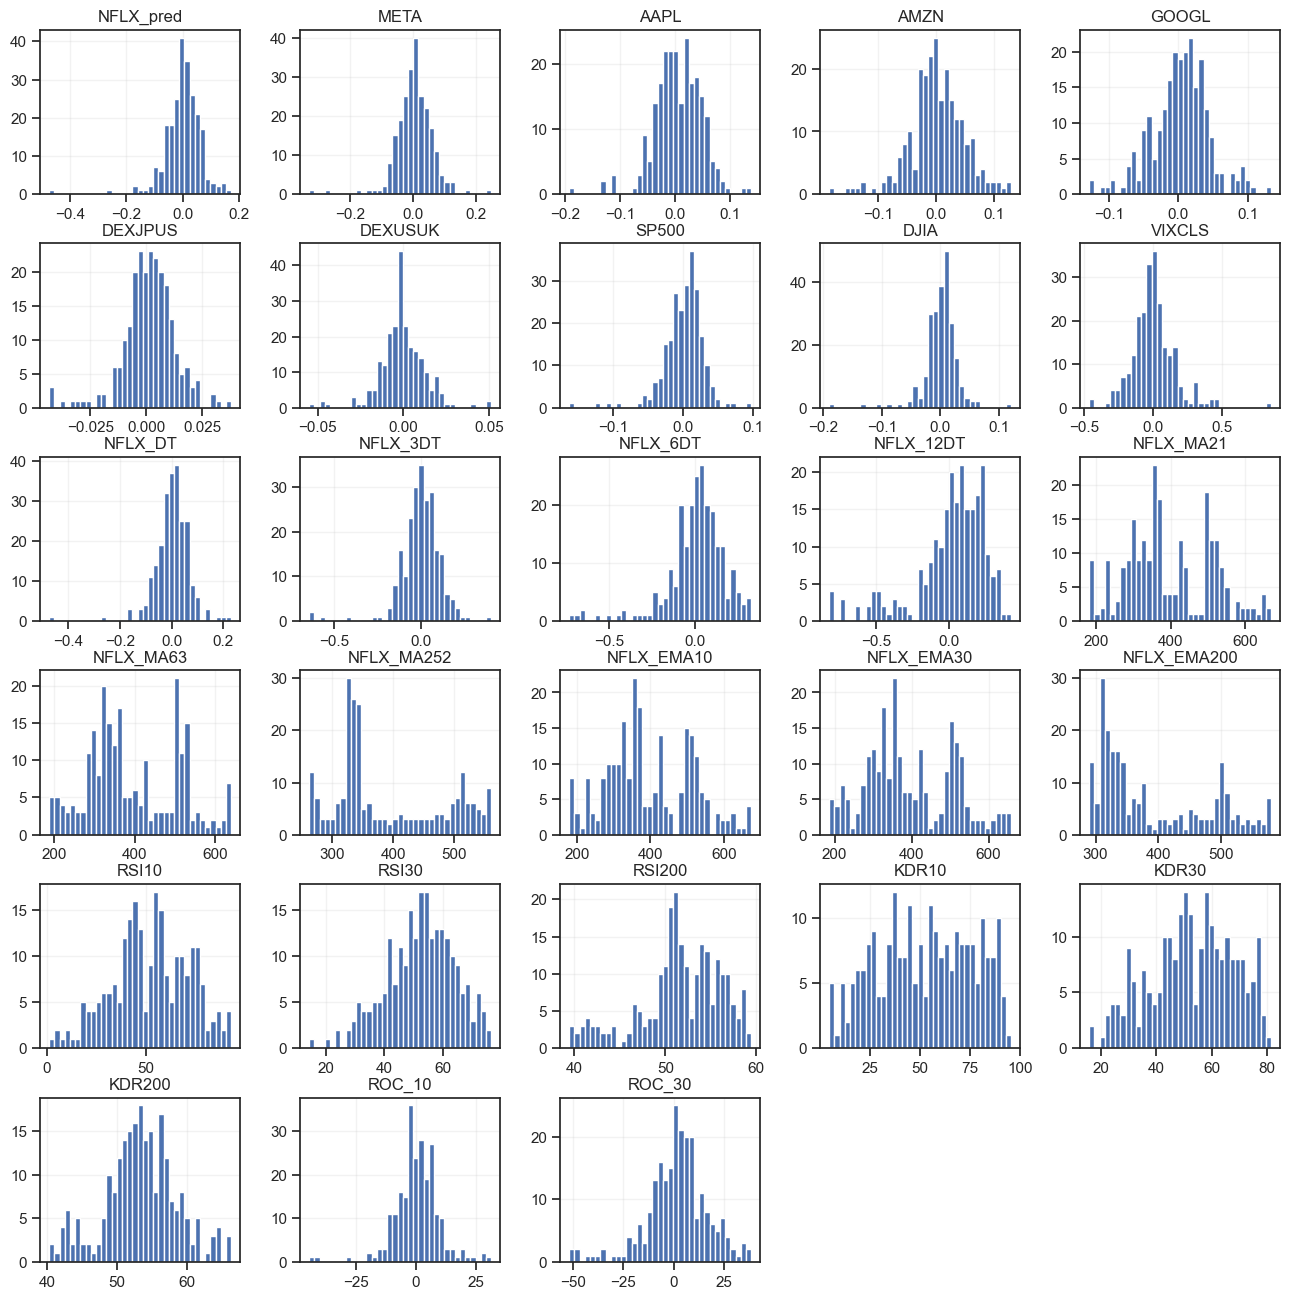

In [80]:
# Team, note that historam is not robust

(data
 .hist(bins = 35,
       sharex = False,
       sharey = False,
       figsize =[16, 16]
      )
)
plt.show()

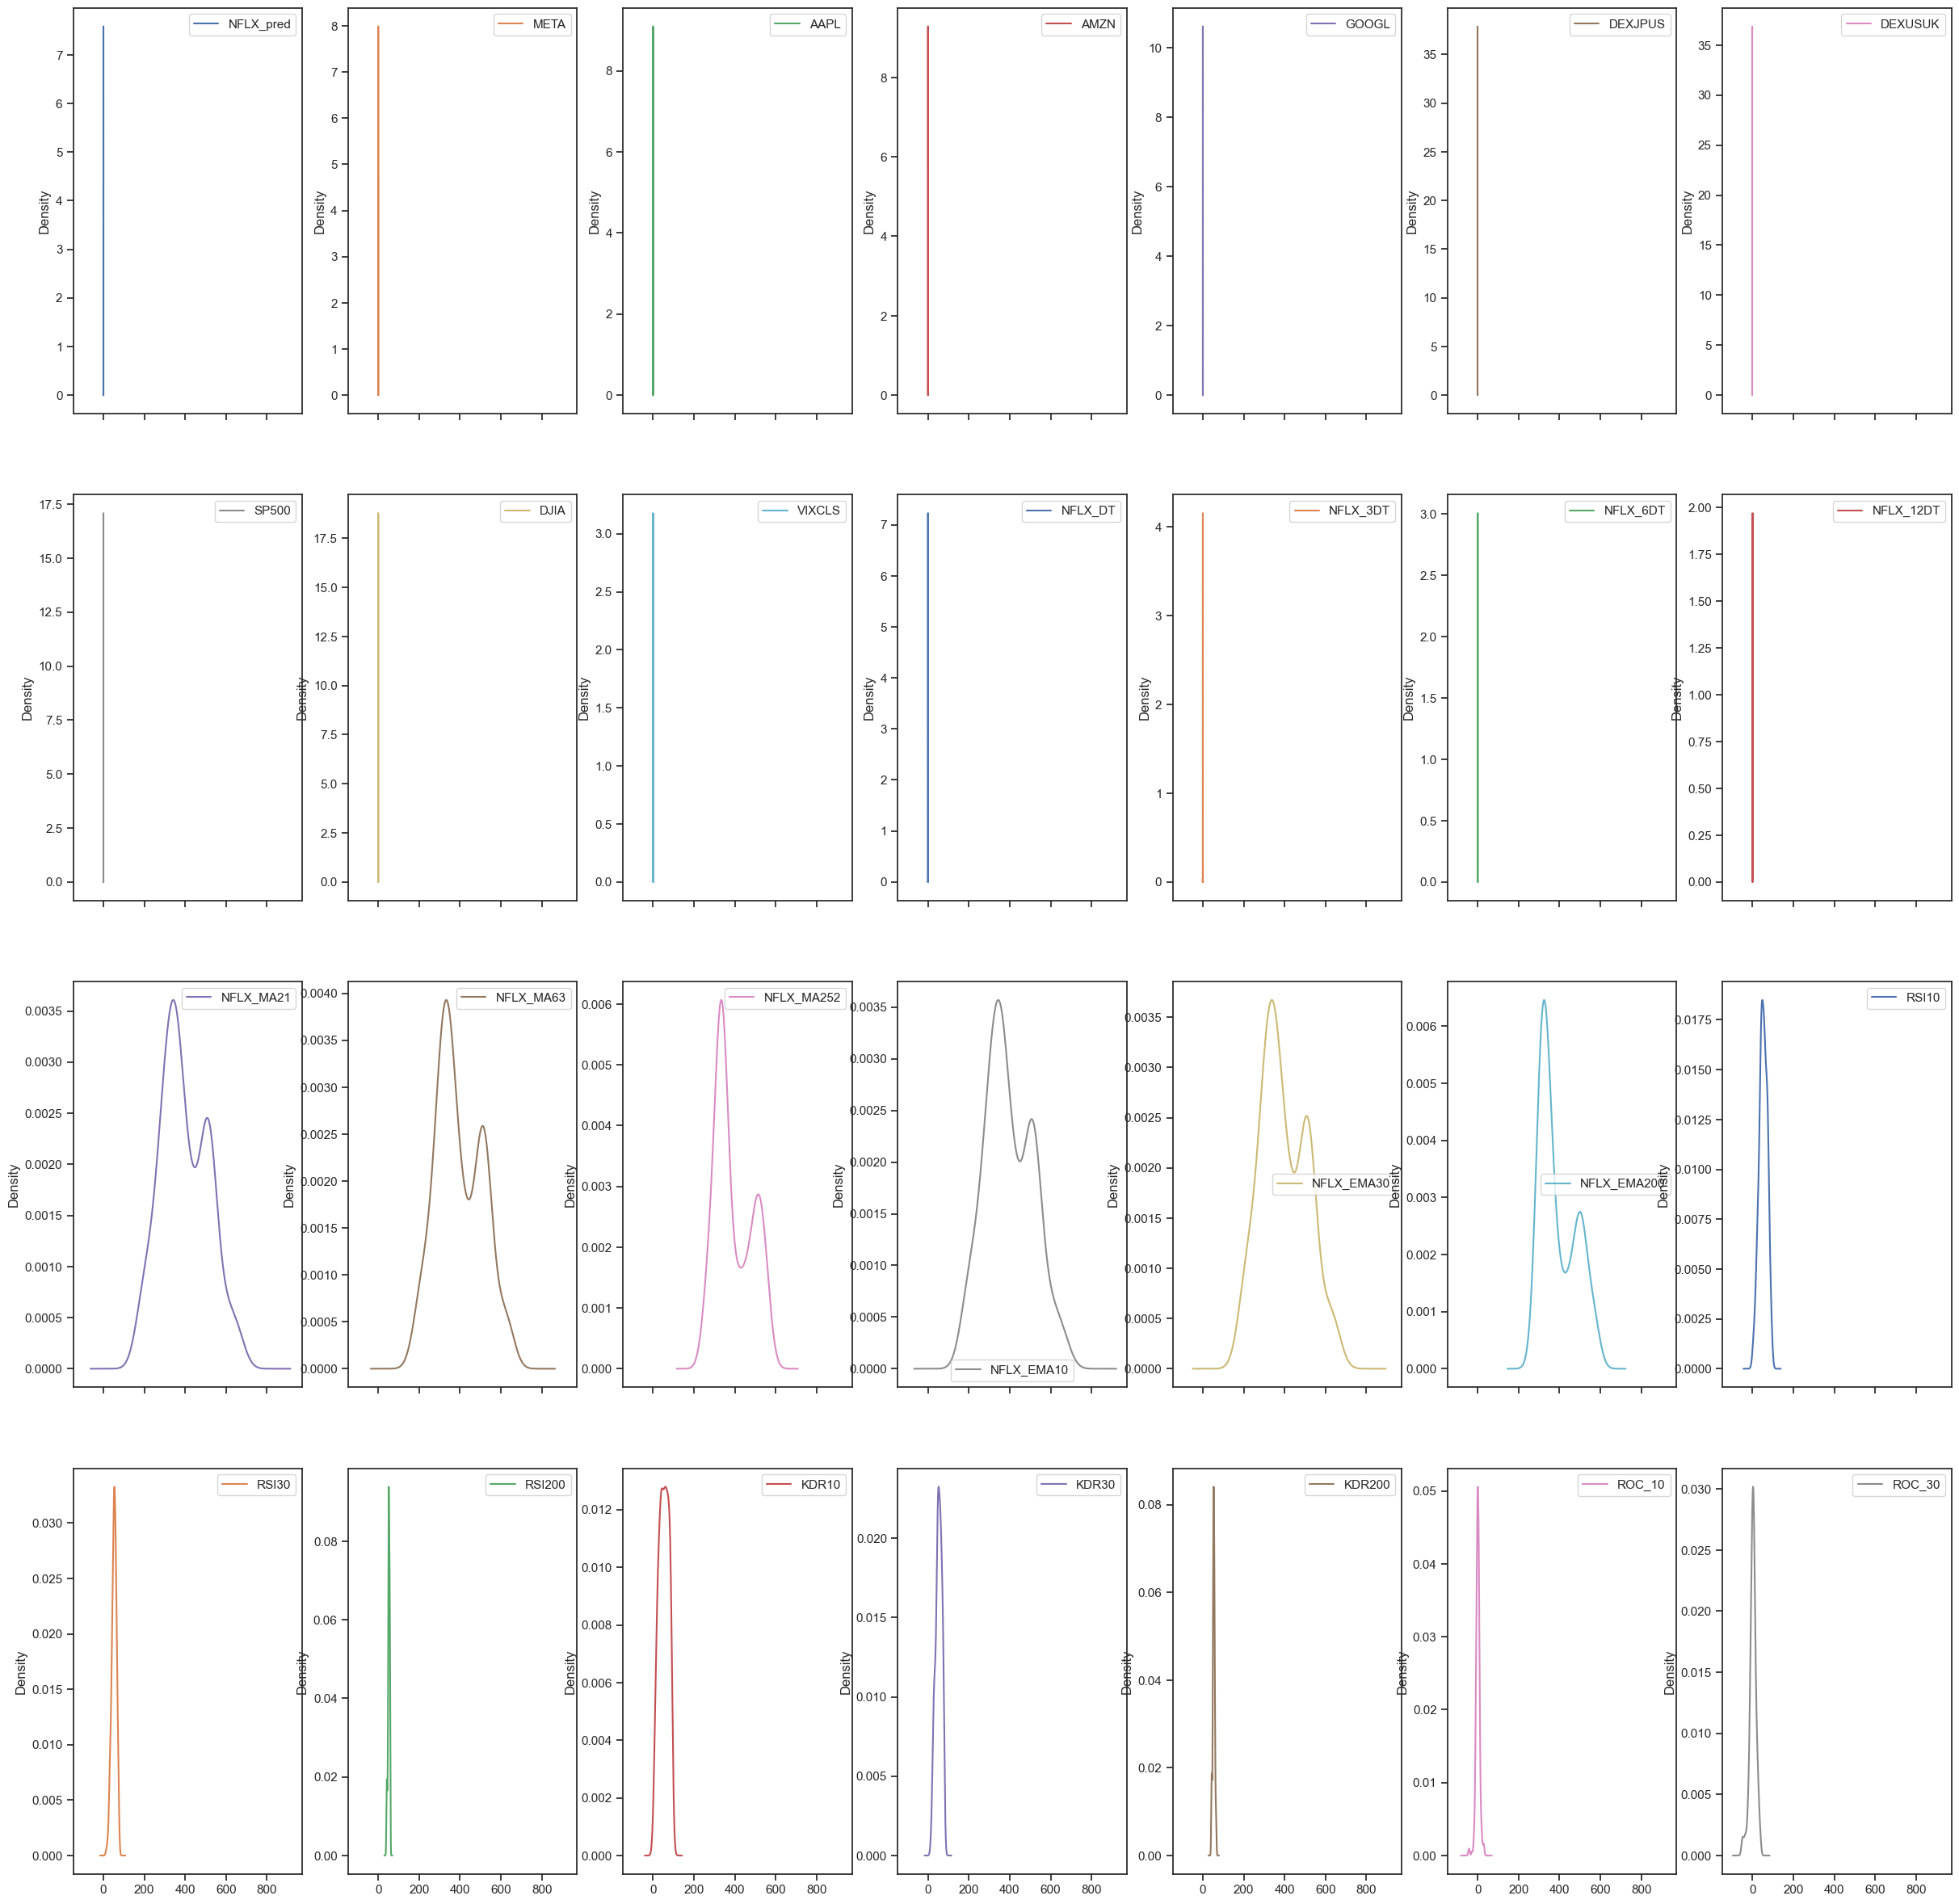

In [81]:
(
    data.
    plot(kind="density",
         subplots=True,
         layout=(4, 7),  # Corrected layout
         sharex=True,
         legend=True,
         figsize=[30, 30]
    )
)

plt.show()

In [82]:
# cross-validation is NOT testing set

validation_size = 0.25 # this refers to testing set

train_size =\
    int(len(X) 
        * 
        (1 - validation_size)
       )

X_train, X_test =\
    (X[0         :train_size], 
     X[train_size:len(X)    ]
    )

Y_train, Y_test =\
    (Y[0         :train_size], 
     Y[train_size:len(X)    ]
    )

In [83]:
len(X)

235

In [84]:
num_folds = 10
seed = 231029
scoring = "neg_mean_squared_error"

In [85]:
models = []

In [86]:
models.append(("LR", LinearRegression()
             )
            )

models.append(("LASSO", Lasso()
             )
            )

models.append(("EN", ElasticNet()
             )
            )

models.append(("CART", DecisionTreeRegressor()
             )
            )

models.append(("KNN", KNeighborsRegressor()
             )
            )

models.append(("SVR", SVR()
             )
            )

In [87]:
# Bagging (Boostrap Aggregation)

models.append(("RFR", RandomForestRegressor()
              )
             )

models.append(("ETR", ExtraTreesRegressor()
              )
             )

# Boosting

models.append(("GBR", GradientBoostingRegressor()
              )
             )

models.append(("ABR", AdaBoostRegressor()
              )
             )


### outdated tests
### light GBM
### CAT Boost

In [88]:
# Gift for you

# Team, let me guide you through this step-by-step

### Initialization of Lists:

names = []

kfold_results = []

train_results = []
test_results = []

# Four empty lists are initialized. 
# names will store the names of the models, 
# kfold_results will store the cross-validation results, 
# train_results and test_results 
# will store the performance of the models 
# on the training and testing datasets, respectively.

### Looping through Models:

# Let's iterate over a list of models. 

# Each element in the models list is a tuple 
# containing the name of the model (name) and the model object (model).

for name, model in models:
    
### Appending Model Names:

# The name of the current model is appended to the names list.

    names.append(name)
    
### Let's run K-fold Cross-Validation
    
    kfold =\
        (KFold(n_splits = num_folds,
               random_state = seed,
               shuffle = True)
        )
    
# A KFold object is created with a specified number of splits (num_folds), 
# a random seed (seed), 
# and shuffling enabled.
    
### Running Cross-Validation:
# Let's convert MSE to positive (Here, now it becomes lower the better; See below)

    cv_results =\
        (
         -1
         *
         cross_val_score(model, X_train, Y_train,
                         cv = kfold,
                         scoring = scoring)
        )
        
# Cross-validation is performed on the training data (X_train, Y_train) using the current model. 
# The negative mean squared error is used 
# as the scoring metric 
# (hence multiplied by -1 to make it positive, 
# as the convention is that higher scores are better).

# Storing Cross-Validation Results:
 
### The cross-validation results for the current model are appended to the kfold_results list.    
    
    kfold_results.append(cv_results)

# Fitting the Model on the Entire Training Set:
  
    res = model.fit(X_train, Y_train) # The model is trained on the entire training dataset.

### Evaluating Model on Training Set:

# The trained model’s predictions on the training set are evaluated 
# using the mean squared error, and the result is appended to train_results.

    train_result = mean_squared_error(res.predict(X_train), Y_train)
    
    train_results.append(train_result)

## Evaluating Model on Testing Set:    
    
# Similarly, the model’s performance is evaluated 
# on the testing set and appended to test_results.
    
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    
    test_results.append(test_result)
    
# Printing the Results:

# The name of the model, 
# the average cross-validation score, 
# the standard deviation of the cross-validation scores, 
# the training set performance, 
# and the testing set performance are printed out.

    message = "%s: %f (%f) %f %f" % (name, cv_results.mean(), 
                                     cv_results.std(), 
                                     train_result, 
                                     test_result)
    print(message)

LR: 0.004780 (0.004049) 0.004183 0.003776
LASSO: 0.004405 (0.004007) 0.004382 0.003655
EN: 0.004405 (0.004007) 0.004382 0.003655
CART: 0.010013 (0.007308) 0.000000 0.009072
KNN: 0.005670 (0.004030) 0.003873 0.004354
SVR: 0.006845 (0.005439) 0.004074 0.004261
RFR: 0.005315 (0.003905) 0.000699 0.005848
ETR: 0.005424 (0.004202) 0.000000 0.004605
GBR: 0.006731 (0.004040) 0.000249 0.005832
ABR: 0.005135 (0.004352) 0.001608 0.004901


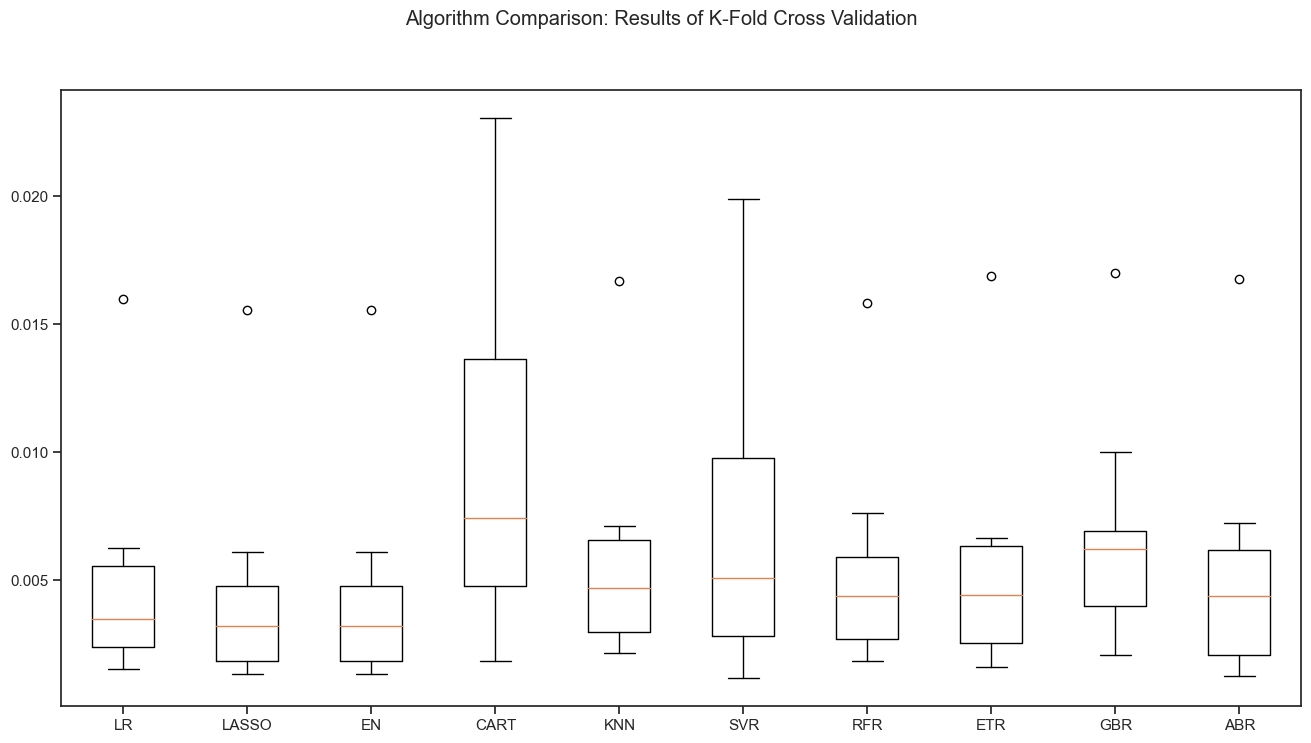

In [89]:
fig = plt.figure(figsize = [16, 8]
                )

fig.suptitle("Algorithm Comparison: Results of K-Fold Cross Validation")

ax = fig.add_subplot(111)

plt.boxplot(kfold_results)

ax.set_xticklabels(names)

plt.show()

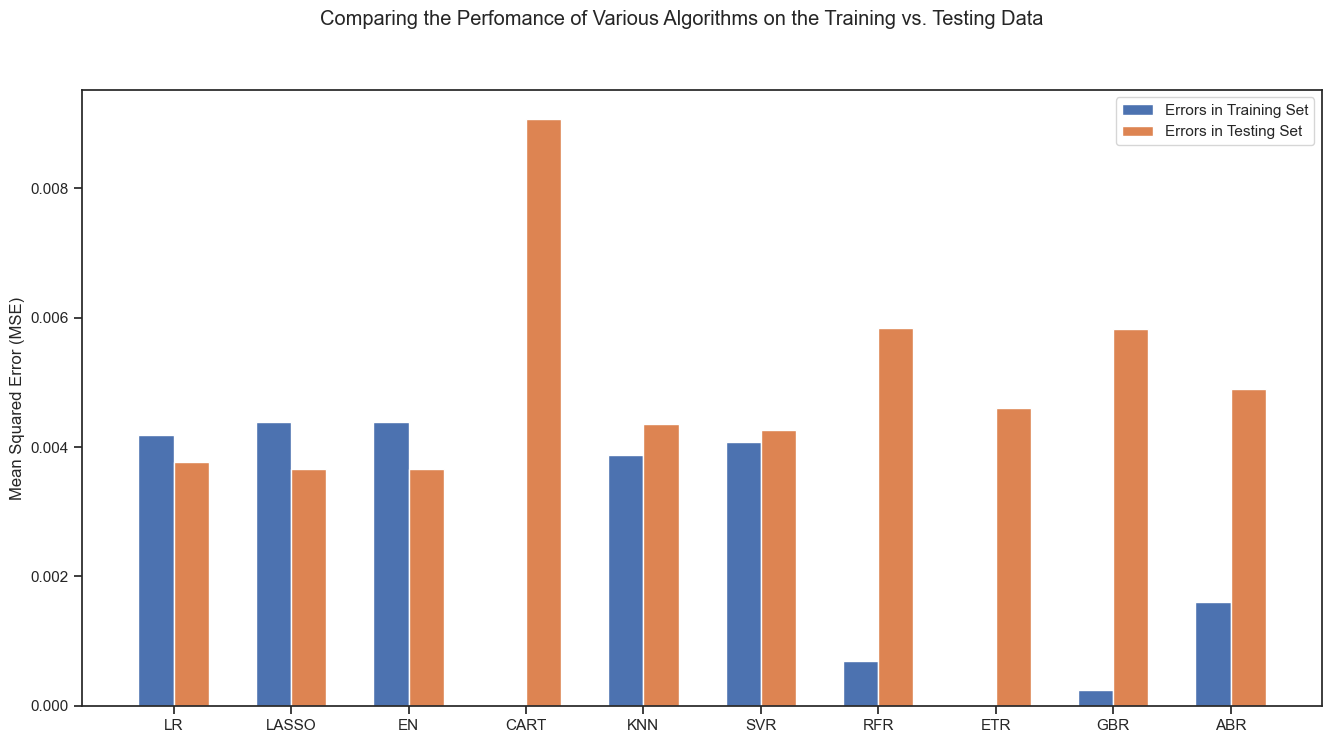

In [90]:
fig = plt.figure(figsize = [16, 8])

ind = np.arange(len(names)
               )

width = 0.30

fig.suptitle("Comparing the Perfomance of Various Algorithms on the Training vs. Testing Data")

ax = fig.add_subplot(111)

(plt
 .bar(ind - width/2,
    
      # Team, this line calculates the starting x position of the bars 
      # representing "Errors in Training Set". 
      # The width/2 term is used to shift the bars to the left, 
      # so they are centered around the tick mark for each group (algorithm) on the x-axis.
      
      # The bar chart will have two sets of bars for each algorithm: 
      # one for training errors and one for testing errors. 
      
      # By subtracting width/2 from ind, 
      # the training error bars are positioned to the left of the center of the tick marks. 
      
      train_results,
      width = width,
      label = "Errors in Training Set")
)

(plt
 .bar(ind + width/2,
      test_results,
      width = width,
      label = "Errors in Testing Set")
)

plt.legend()

ax.set_xticks(ind)
ax.set_xticklabels(names)

plt.ylabel("Mean Squared Error (MSE)")

plt.show()

> Model of choice:
1. LR
2. KNN
3. SVR

In [91]:
decision = ['LR', 'KNN', 'SVR']
print("LR" in decision)

True


In [92]:
models

[('LR', LinearRegression()),
 ('LASSO', Lasso()),
 ('EN', ElasticNet()),
 ('CART', DecisionTreeRegressor()),
 ('KNN', KNeighborsRegressor()),
 ('SVR', SVR()),
 ('RFR', RandomForestRegressor()),
 ('ETR', ExtraTreesRegressor()),
 ('GBR', GradientBoostingRegressor()),
 ('ABR', AdaBoostRegressor())]

### <font color = red> Answer 8 is presented in the cell below: </font>

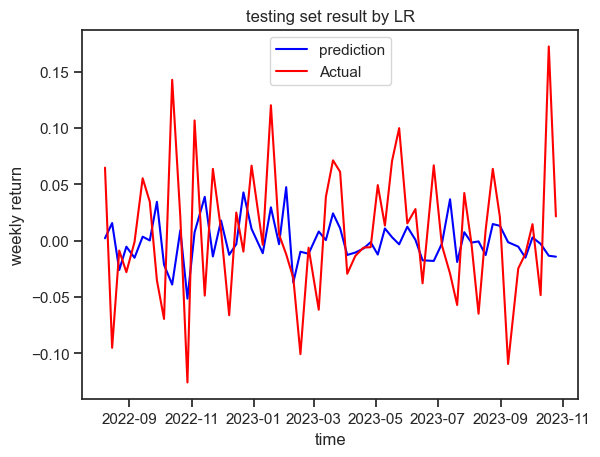

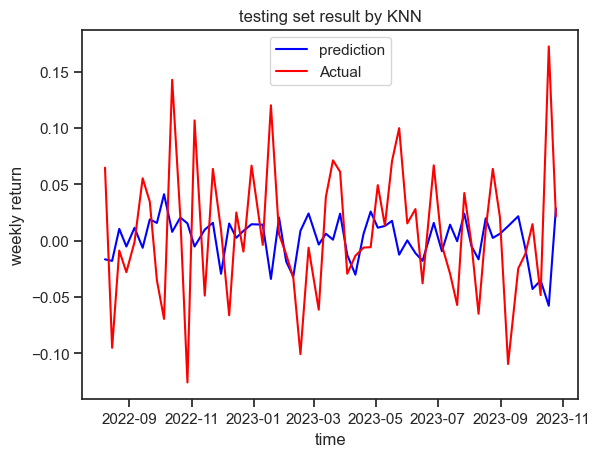

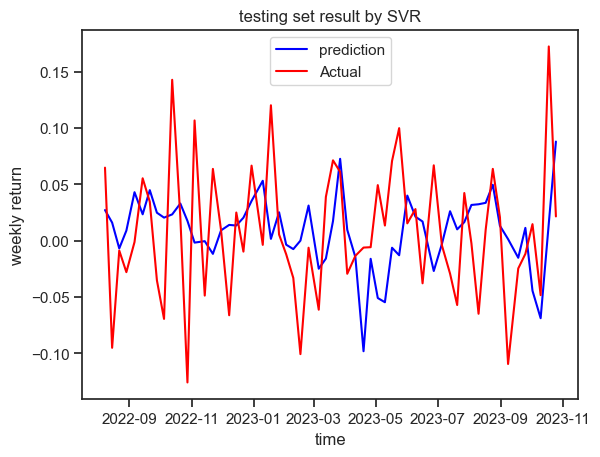

In [93]:
for name, model in models:

    if name not in decision:
        continue
  
    res = model.fit(X_train, Y_train) # The model is trained on the entire training dataset.

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot the first line (y1)
    ax.plot(X_test.index, res.predict(X_test), label='prediction', color='blue')

    # Plot the second line (y2)
    ax.plot(X_test.index, Y_test, label='Actual', color='red')

    # Add labels, title, and legend
    ax.set_xlabel('time')
    ax.set_ylabel('weekly return')
    ax.set_title(f'testing set result by {name}')
    ax.legend()
    # Display the plot
    plt.show()

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊